# Social Network Analysis - Amber Heard Case - YouTube

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>YouTube - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument/39942121

In [2]:
cd ../Filtered Data/comments_cleaned

/Users/mnagy99/jupyter/AH/YouTube_Bot_Analysis/Filtered Data/comments_cleaned


|          Column          |                          Definition                          |
| :----------------------- | :----------------------------------------------------------- |
| etag                     | Record (entity tag); **Unique for each record**                 |
| tl_etag                  | Top Level Comment eTag                                       |
| tl_id                    | Top Level Comment ID                                         |
| tl_video_id              | Top Level Comment Video ID                                   |
| tl_text                  | Top Level Comment Text                                       |
| tl_author_display_name   | Top Level Comment Display name **Not Unique**                |
| tl_author_channed_id     | Top Level Comment Channel ID   **Unique for each Author**    |
| tl_n_likes               | Top Level Comment Number of Likes                            |
| tl_comment_puplish_dtime | Top Level Comment Number Publish Date Time                   |
| tl_comment_update_time   | Top Level Comment Number Update Date Time                    |
| n_replies                | Number of Replies of each record                             |
| replies.comments         | UNDER INVESTIGATIONS                                         |
| tl_moderation_status     | Top Level Comment Moderation Status (Classified Spam or Not) |

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned_zipped.csv", compression='zip',
                          low_memory=False, lineterminator='\n')

df_comments["p_dtime"] = pd.to_datetime(df_comments["p_dtime"])
df_comments["date"] = pd.to_datetime(df_comments["date"])
df_comments["u_dtime"] = pd.to_datetime(df_comments["u_dtime"])

print(df_comments.shape)
df_comments.head()

(2176543, 20)


,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
0,DiXRVYRZchs,mvtTos5huTqXhtAs-JPzt7mls_A,UgjyORuX3p35VXgCoAEC,good work!,Shocka Delica,UC6cJzw3ChENHVREKzpx1e3Q,9.0,2013-11-29 05:18:47+00:00,2013-11-29 05:18:47+00:00,1.0,NaN,comment,none,none,none,2013,2013-11-29,Nov,29,5
1,VPUUrdgxIa8,XpsHQJXeW3QznSOnkHg2LFrp-dU,UggV-BvKpFaaaHgCoAEC,fake lesbian career boost fail,Vincent Lyle,UCSKuFV9GWVXgh3dtdKCxZoQ,2.0,2013-12-27 21:05:54+00:00,2013-12-27 21:05:54+00:00,0.0,NaN,comment,none,none,none,2013,2013-12-27,Dec,27,21
2,VPUUrdgxIa8,VRefhV-4H8413hvRHP5-zKWyNuQ,Ugio47Mc-eG0dHgCoAEC,so during movie shoots some actresses use dild...,"Soluchi {Michael Jackson Lookalike, Dancer, VFX}",UCQb__wEpi5q8_xhkuk2jm5g,2093.0,2013-12-26 01:24:40+00:00,2013-12-26 01:24:40+00:00,7.0,NaN,comment,none,none,none,2013,2013-12-26,Dec,26,1
3,VPUUrdgxIa8,auBUVEx3Zm2I35CN0iASII7-3V4,Ugj0tLP9hfrMkXgCoAEC,god liam hemsworth looks insanely a lot like h...,Chris Andreev,UCseIHRwQ0oAAXK2-e8E2_FA,0.0,2013-12-07 21:22:41+00:00,2013-12-07 21:22:41+00:00,3.0,NaN,comment,none,none,none,2013,2013-12-07,Dec,7,21
4,VPUUrdgxIa8,6NhfYEJJ6zK5ieP-jD9dB25SC-k,Ughdfu9Z390BW3gCoAEC,i'd watch her day and night,Dzimka Bujiashvili,UCzPTU13Mb7dO1jgIbHp2ABw,7.0,2013-12-04 23:01:35+00:00,2013-12-04 23:01:35+00:00,0.0,NaN,comment,none,none,none,2013,2013-12-04,Dec,4,23


In [4]:
df_comments.p_dtime.dt.date.min(), df_comments.p_dtime.dt.date.max()

(datetime.date(2008, 3, 26), datetime.date(2021, 12, 8))

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176543 entries, 0 to 2176542
Data columns (total 20 columns):
 #   Column                Dtype              
---  ------                -----              
 0   video_id              object             
 1   comment_etag          object             
 2   comment_id            object             
 3   text                  object             
 4   username              object             
 5   author_ch_id          object             
 6   nlikes                float64            
 7   p_dtime               datetime64[ns, UTC]
 8   u_dtime               datetime64[ns, UTC]
 9   nreplies              float64            
 10  moderation_status     object             
 11  comment_reply         object             
 12  parent_id             object             
 13  author_ch_url         object             
 14  author_profile_image  object             
 15  year                  int64              
 16  date                  datetime64[ns]

In [6]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 532
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2174298
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [7]:
df_comments.dropna(subset=['text'], inplace=True)

In [8]:
sum(df_comments.p_dtime != df_comments.u_dtime)

133253

In [9]:
for col in ['year', 'username', 'moderation_status', 'comment_reply']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head())
    print('\n')

The value counts of year
2020    893138
2021    792578
2018    192108
2019    118408
2016     54618
Name: year, dtype: int64


The value counts of username
Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Name: username, dtype: int64


The value counts of moderation_status
likelySpam    2240
Name: moderation_status, dtype: int64


The value counts of comment_reply
comment    1692570
reply       483441
Name: comment_reply, dtype: int64




<br>

In [10]:
df_creations = pd.read_csv('daily_creations.csv')
df_creations.date = pd.to_datetime(df_creations.date)
print(df_creations.shape)
df_creations.head()

(76597, 8)


,date,year,month,dayofmonth,hour,ncomments,nreplies,nlikes
0,2018-07-21,2018,Jul,21,20,6998,2994,38909
1,2018-07-21,2018,Jul,21,19,4877,2181,30351
2,2020-10-24,2020,Oct,24,8,4404,1121,24569
3,2018-07-21,2018,Jul,21,21,3153,1087,16811
4,2018-11-19,2018,Nov,19,17,2673,1775,21042


<br>

In [11]:
# Create an empty set of negatively commenting users
neg_users = set()

In [12]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [13]:
# Those users were checked and did not find negative comments
checked_set = {'eHacker', 'Stevie J Raw', 'DarthN3ws', "Nerdette's NewsStand", 'Sunshine', 'Binge Central',
               'Abbey Sharp', 'ko 3', 'Mary Shephard', 'Madison Beer', 'Baby Bunny', 'LadyDominion',
               'Tom Harlock', 'Gus Johnson', 'Mr. Bruhhh', 'Crypto Info 2', 'demi demi', '8-Bit Tex', 'Ty Y', 
               'Incredibly Average', 'DELCARAJO TV', 'Flashback FM','Funeral bug', 'Stranger In the Alps', 
               "Nerdette's NewsStand"}

In [14]:
neg_users = neg_users - checked_set

In [15]:
len(neg_users)

228339

<br>

<a id='top_commented'></a>
>## Top Commented Users
> <ul>
 <li><a href="#top_commented"><b>Top Commented Users</b></a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

In [16]:
df_top_users = (
    df_comments["username"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "username", "username": "n_comments"})
)

In [17]:
myset = {'JOHNNY DEPP', 'Johnny depp', 'Johnny Depp', 'Lindsey Depp', 'LaraCroftEyes1', "Rob's Rules", 'Julie Lea', 'Tania Haeussler', 
         'PureSparkles22', 'J Lee', 'NIBS', 'Lorri Holder', 'Michael Keaton', 'Rock Candy'} 

In [18]:
colors = []
for user in df_top_users.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


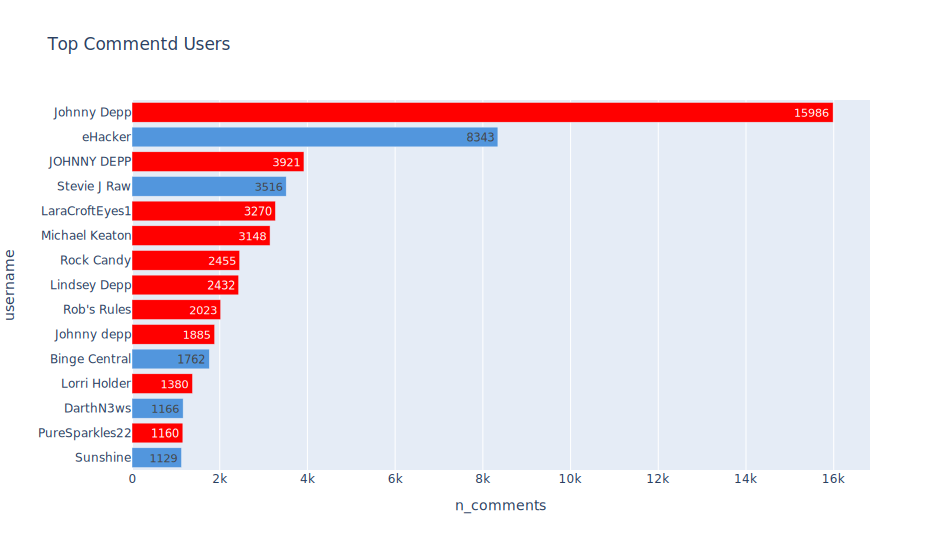

In [19]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_top_users.head(15), "Top Commentd Users", c=colors)

In [20]:
# df_comments[df_comments.username == 'eHacker'].text.value_counts().head()

In [21]:
# df_comments[df_comments.username == 'Stevie J Raw'].text.value_counts().head()

## Johnny Depp

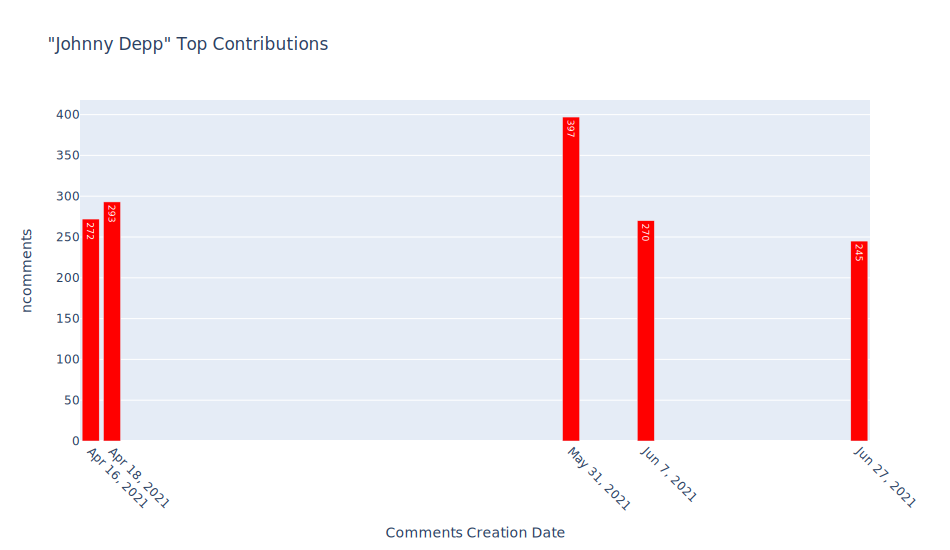

In [22]:
helpers.contr_peaks(df_comments, "Johnny Depp", n=5, threshold=0)

In [23]:
df_comments[df_comments.username == 'Johnny Depp'].text.value_counts().head(60)

ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp6005@gmailcom                                                                                                                                                                                                                                                                                                                                             520
a big thank to all my fans!what will my name and career be without all of your love and support? amidst my darkest days you all stood by mei don't have all the time in the world to replybut i do read all your heartwarming comments and truly appreciate all it's because the of 

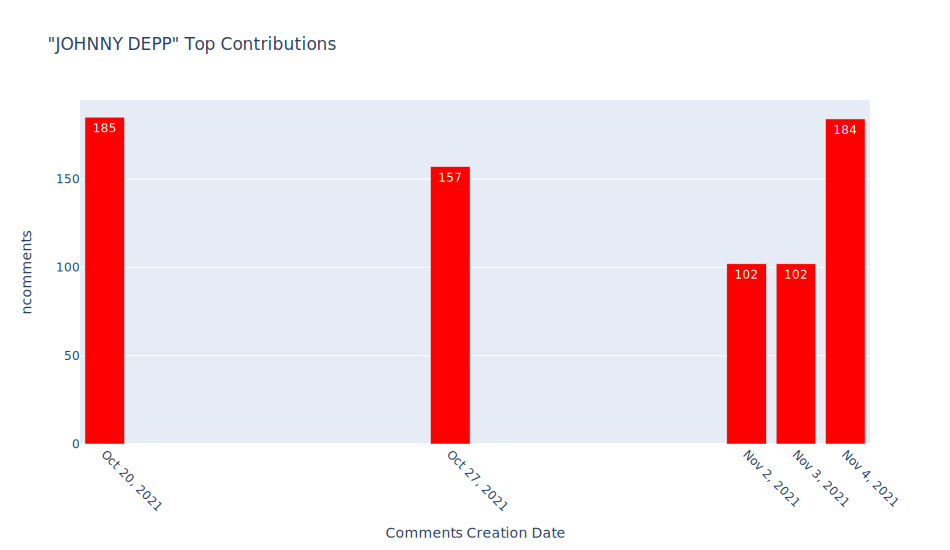

In [24]:
helpers.contr_peaks(df_comments, "JOHNNY DEPP", n=5, threshold=0)

In [25]:
df_comments[df_comments.username == 'JOHNNY DEPP'].text.value_counts().head(60)

ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ                            1020
ًں’•ًں’“thanks for your utmost love which has brought me this far it has been a hard time for me but your support got me going where are you watching from?ًں’•                                                                                                                                                                                                                279
â‌¤ï¸ڈthanks for your unending love and support you have constantly shown me in such difficult moment i'm forever grateful i really appreciate your unconditional love to me and every effort exerted by you to cause a change¦where are you watching from?       

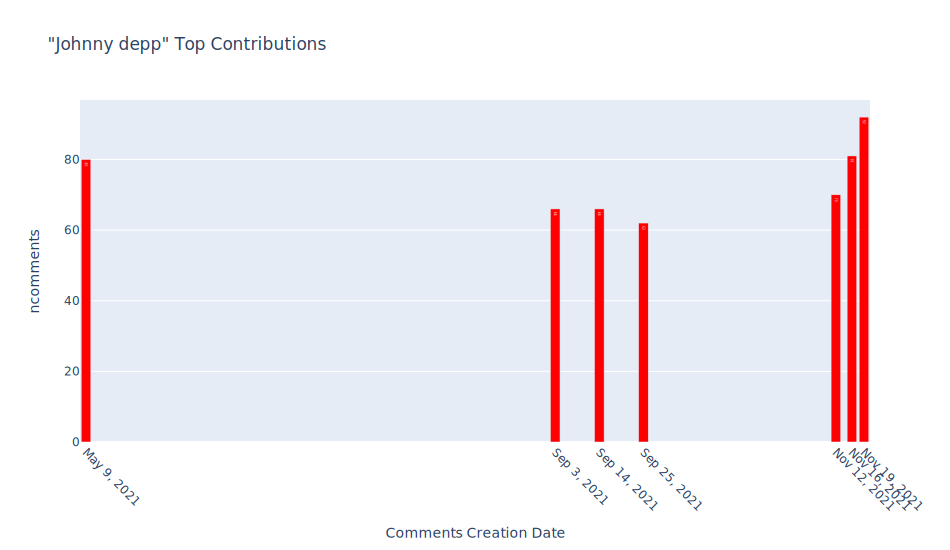

In [26]:
helpers.contr_peaks(df_comments, "Johnny depp", n=7, threshold=0)

In [27]:
df_comments[df_comments.username == 'Johnny depp'].text.value_counts().head(60)

ًں’‍ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp3099@gmailcom nb:do not send an emaili won't respond                       172
ًں’‍ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments on my post it means alot to me i want you to send me a direct message via hangout using my personal email or you can as well indicate below also endeavor to add your name to the text so i can know you are the one texting because i don't reply unnecessary messages hangout mail: johnnydepp6003@gmailcom nb:do not send an emaili won't respond                       103
ًں’‍ًں’‍i want to specially appreciate you for being a big fan for your nice comments 

In [28]:
neg_users = neg_users | {'Johnny Depp'}
neg_users = neg_users | {'JOHNNY DEPP'}
neg_users = neg_users | {'Johnny depp'}

## Lindsey Depp

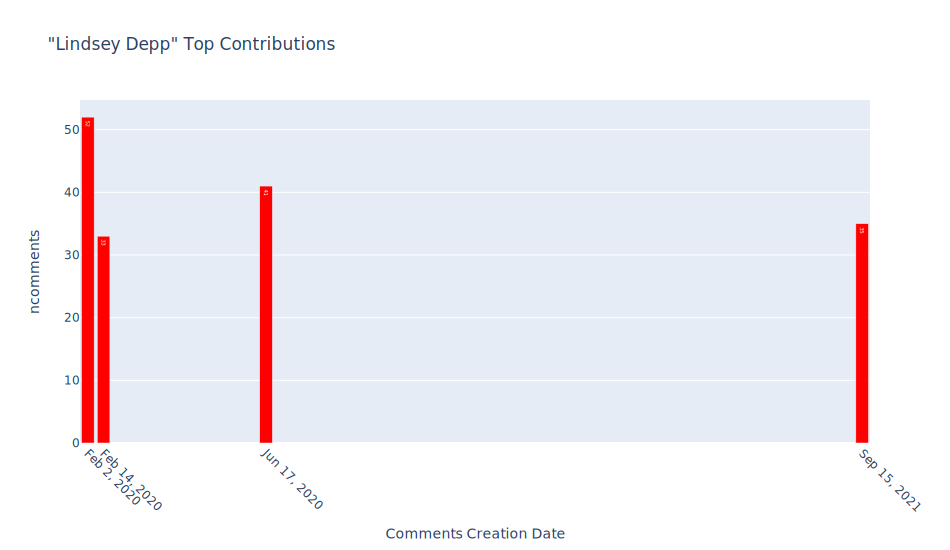

In [29]:
helpers.contr_peaks(df_comments, "Lindsey Depp", n=4, threshold=0)

In [30]:
df_comments[df_comments.username == 'Lindsey Depp'].text.value_counts().head(60)

# justice for johnny depp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     19
###justice for my darling husband to be johnny depp                                                                                                                                                    

In [31]:
neg_users = neg_users | {'Lindsey Depp'}

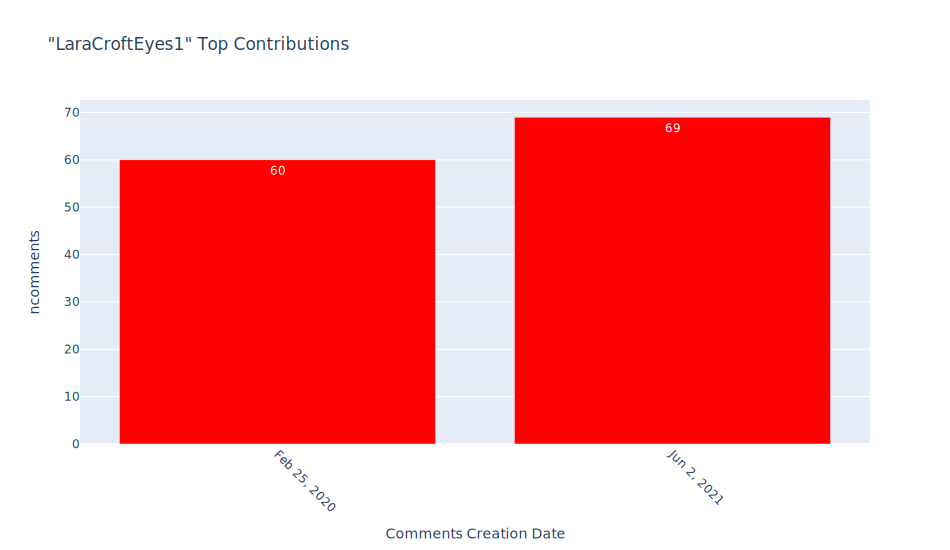

In [32]:
helpers.contr_peaks(df_comments, "LaraCroftEyes1", n=2, threshold=0)

In [33]:
df_comments[df_comments.username == 'LaraCroftEyes1'].text.value_counts().head(60)

what?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [34]:
neg_users = neg_users | {'LaraCroftEyes1'}

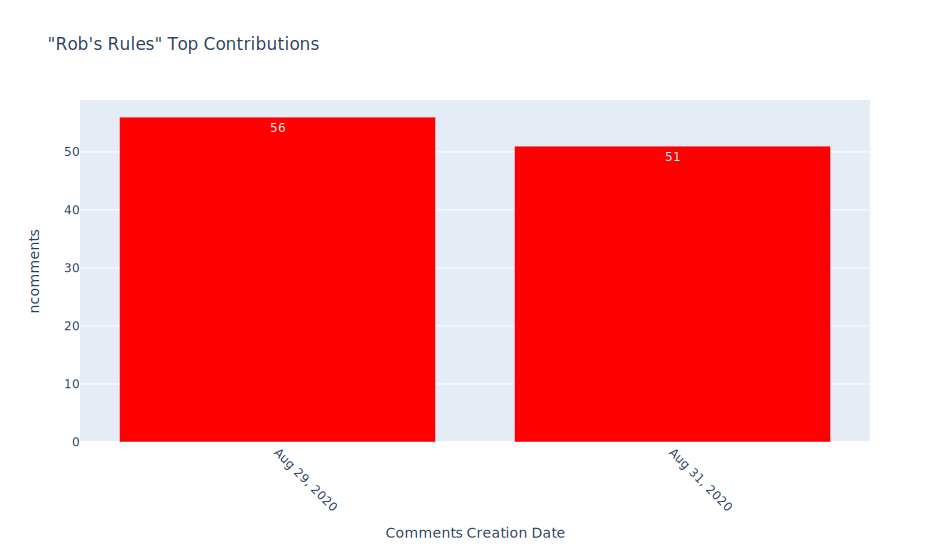

In [35]:
helpers.contr_peaks(df_comments, "Rob's Rules", n=2, threshold=0)

In [36]:
df_comments[df_comments.username == "Rob's Rules"].text.value_counts().head(60)

you are welcome ًں™ڈ                                                                                                                                                                                                                                                                                                                                                                      10
johnny depp vs amber heard videos : https://wwwyoutubecom/playlist?list=pl0zuoy_cxulq6tvrnai8ydd3cvdyaikbx                                                                                                                                                                                                                                                                                 8
thank you ًں™ڈ                                                                                                                                                                                                                                

In [37]:
neg_users = neg_users | {"Rob's Rules"}

In [38]:
# df_comments[df_comments.username == "DarthN3ws"].text.value_counts().head()

In [39]:
# df_comments[df_comments.username == "Nerdette's NewsStand"].text.value_counts().head()

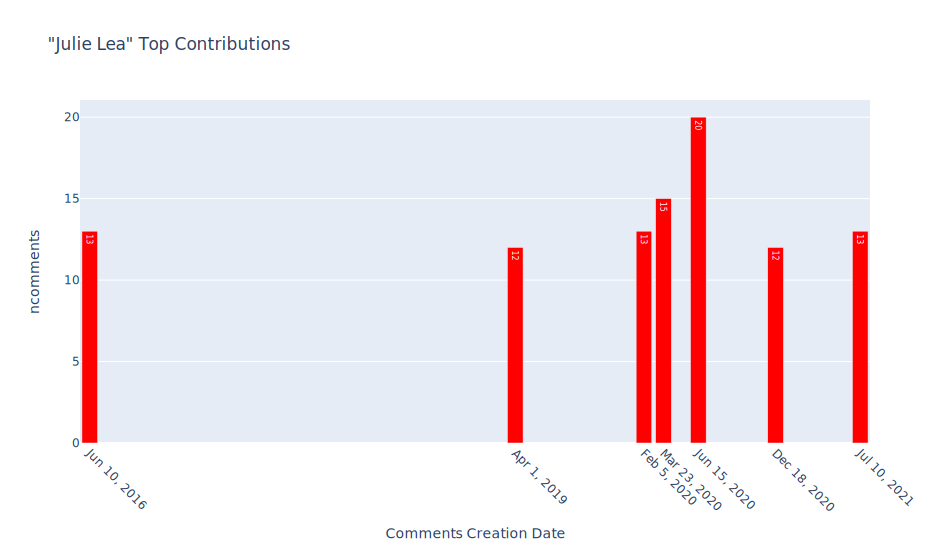

In [40]:
helpers.contr_peaks(df_comments, "Julie Lea", n=7, threshold=0)

In [41]:
df_comments[df_comments.username == "Julie Lea"].text.value_counts().head(60)

@been there nichol has ruled against rupert murdoch in the past nichol's son worked for dan wooten ( back to murdoch) & could have been fired & possibly blackballed out of the industry most parents want to protect their children i'd say that's a strong motivation for nichol to rule in favor of ngn forget amber heardshe has no power except what other's give her forget nichol people thought he sounded sick of ah during her testimony he was frustratedbecause she & her friends made him look more of a idiot josh drew is a outstanding witnessnichol i saw when nichol was ruling what evidence to toss & keep that musk was unimportant as a witnessbeing there the night before court 2016 (magic bruises) where the trial was going & why! rupert murdoch's son works formusk power trickles downnot up follow the rabbit hole & history & it's blatantly obvious murdoch has hated jd for years probably because his multi billion's & power can't buy him youth (he's 81 & looks 100) fame followers crazy fans etc

In [42]:
neg_users = neg_users | {"Julie Lea"}

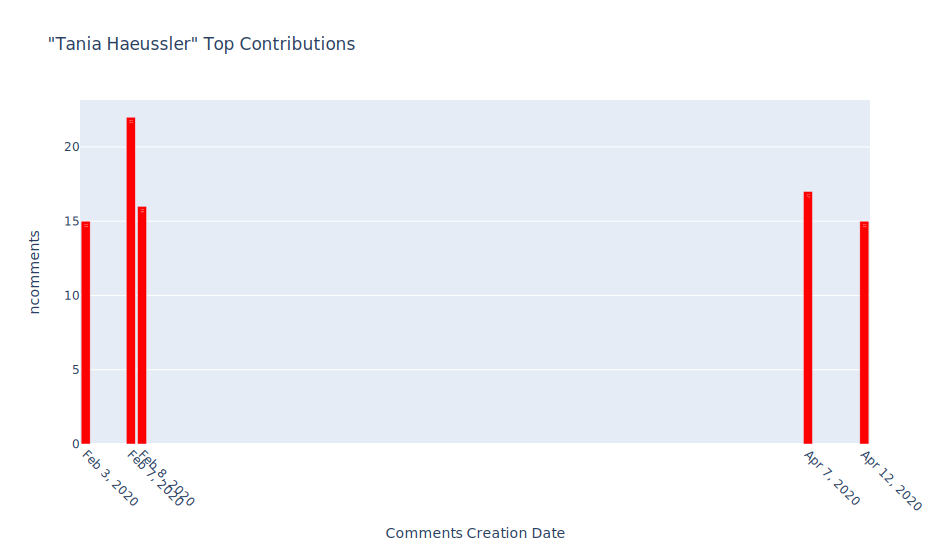

In [43]:
helpers.contr_peaks(df_comments, "Tania Haeussler", n=5, threshold=0)

In [44]:
df_comments[df_comments.username == "Tania Haeussler"].text.value_counts().head(60)

exactly                                                                                                                                                                                                                                                                                                                                                                                                  13
agreed                                                                                                                                                                                                                                                                                                                                                                                                    6
yep                                                                                                                                                                                                             

In [45]:
neg_users = neg_users | {"Tania Haeussler"}

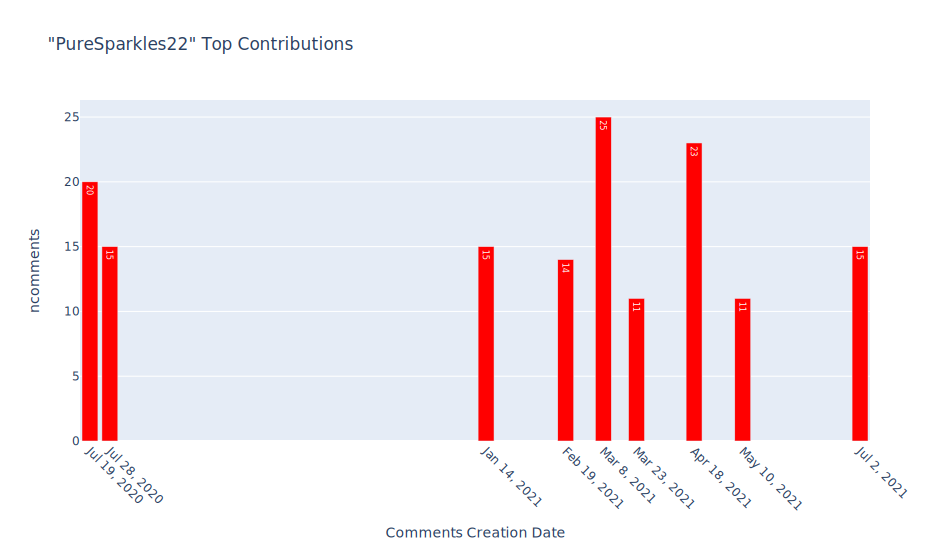

In [46]:
helpers.contr_peaks(df_comments, "PureSparkles22", n=9, threshold=0)

In [47]:
df_comments[df_comments.username == "PureSparkles22"].text.value_counts().head(60)

she is a narcissist                                                                                                                                                                                                                                                                                   4
she is an abuser                                                                                                                                                                                                                                                                                      4
#amberheardisanabuser                                                                                                                                                                                                                                                                                 3
abuser heard                                                                                                    

In [48]:
neg_users = neg_users | {"PureSparkles22"}

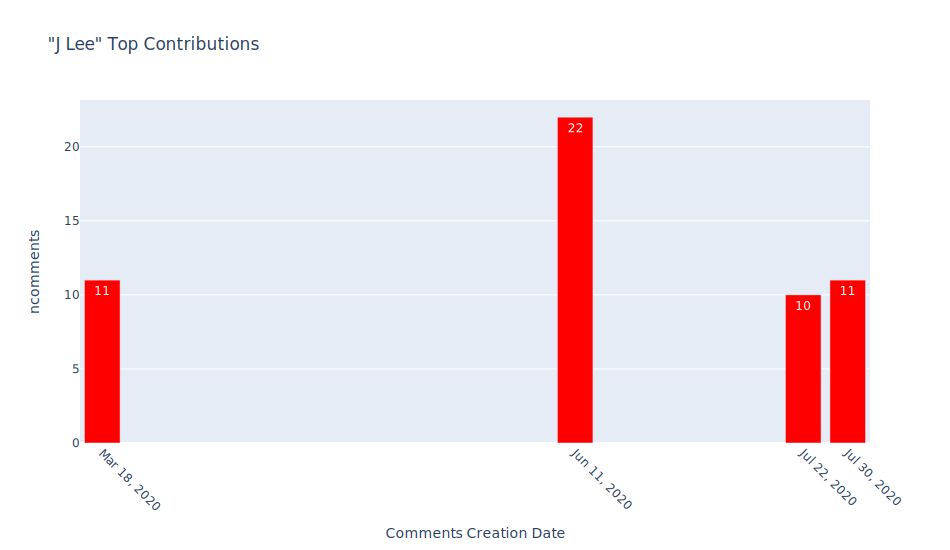

In [49]:
helpers.contr_peaks(df_comments, "J Lee", n=4, threshold=0)

In [50]:
df_comments[df_comments.username == "J Lee"].text.value_counts().head(60)

ًںژ¯                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [51]:
neg_users = neg_users | {"J Lee"}

In [52]:
# df_comments[df_comments.username == "Abbey Sharp"].text.value_counts().head()

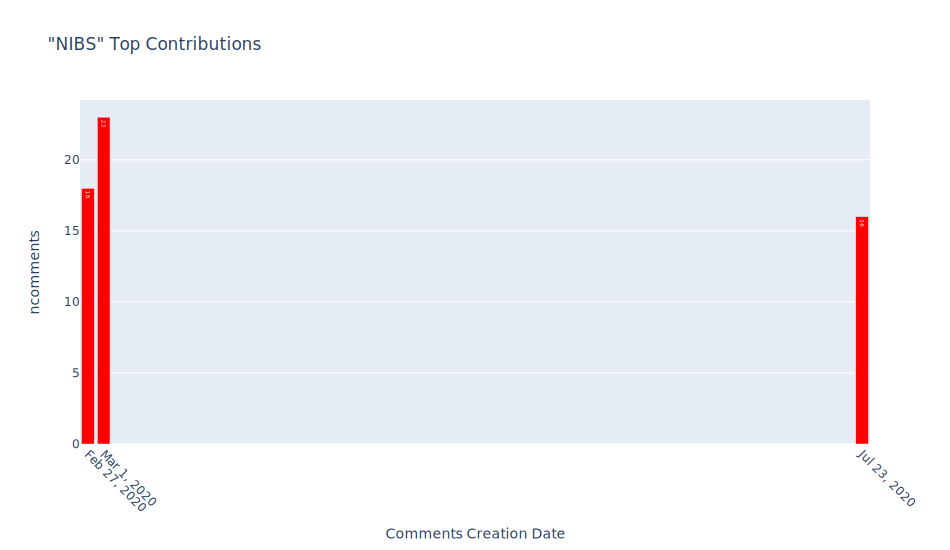

In [53]:
helpers.contr_peaks(df_comments, "NIBS", n=3, threshold=0)

In [54]:
df_comments[df_comments.username == "NIBS"].text.value_counts().head(60)

very well said!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [55]:
neg_users = neg_users | {"NIBS"}

In [56]:
# df_comments[df_comments.username == "ko 3"].text.value_counts().head()

In [57]:
# df_comments[df_comments.username == 'Sunshine'].text.value_counts().head(10)

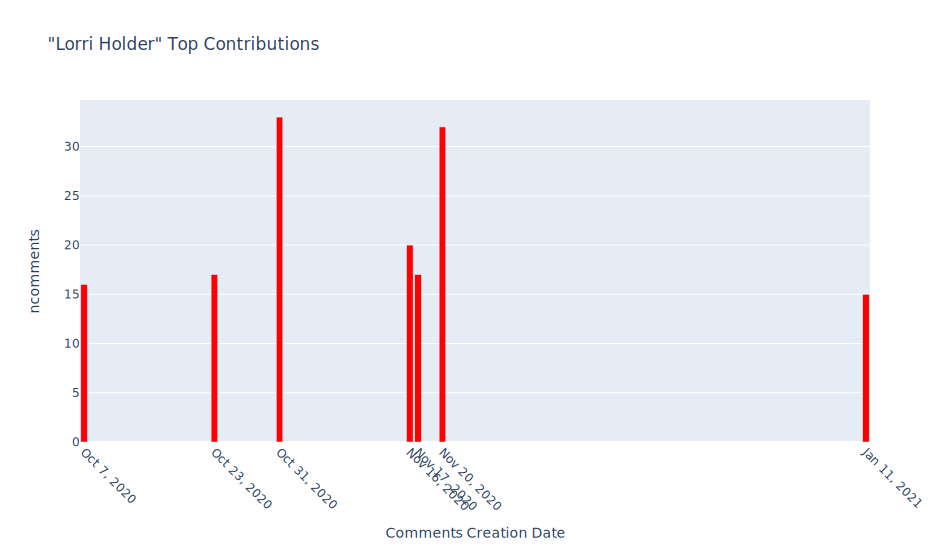

In [58]:
helpers.contr_peaks(df_comments, "Lorri Holder", n=7, threshold=0)

In [59]:
df_comments[df_comments.username == 'Lorri Holder'].text.value_counts().head()

#justiceforjohnnydepp                    13
justiceforjohnny                          8
#justiceforjohnnydepp #fireamberheard     5
omg                                       3
wow your good                             3
Name: text, dtype: int64

In [60]:
neg_users = neg_users | {"Lorri Holder"}

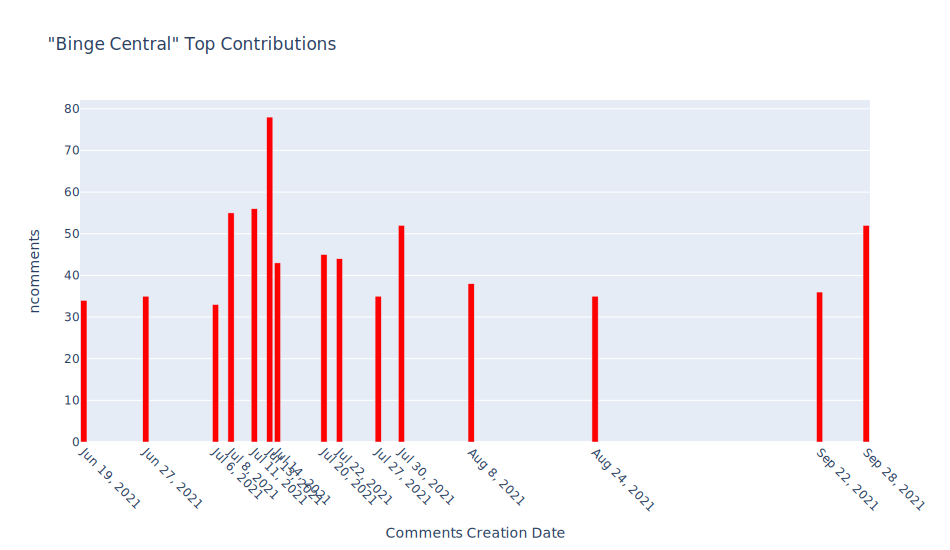

In [61]:
helpers.contr_peaks(df_comments, "Binge Central", n=15, threshold=0)

In [62]:
df_comments[df_comments.username == 'Binge Central'].text.value_counts().head(60)

âœٹًںڈ½âœٹًںڈ½              10
seriously                   10
ًں™ڈًںڈ»ًں™ڈًںڈ»             9
ًں‘چًںڈ»ًں‘چًںڈ»             8
ًںک‚ًںک‚                     7
ًں’¯ًں’¯                     7
johnny >>                    7
yep                          7
seriously tho                7
always                       6
facts                        6
loll                         6
don't do it                  5
woah                         5
needs justice                5
woahh                        5
ًں’ھًںڈ¼ًں’ھًںڈ¼             5
good for you                 4
agreed                       4
dangggg                      4
i see what you did there     4
depp >>                      4
good one                     4
you are correct              3
very true                    3
what                         3
yessss                       3
i hope not                   3
idk about that one           3
woahhh                       3
yesss                        3
never                        3
for sure

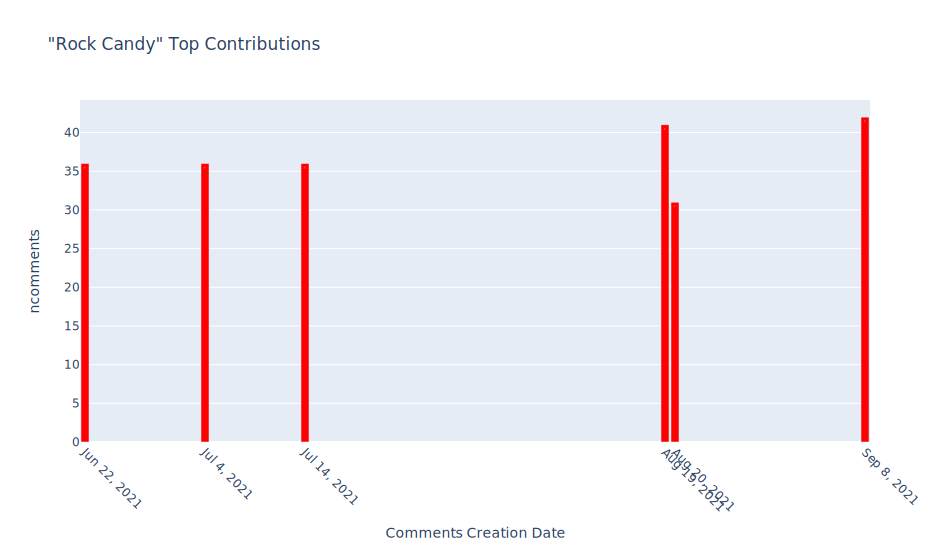

In [63]:
helpers.contr_peaks(df_comments, "Rock Candy", n=6, threshold=0)

In [64]:
df_comments[df_comments.username == 'Rock Candy'].text.value_counts().head()

j4j                                                                    10
amber hasn't been sentenced to jail time at least not yetclick bait     6
lol                                                                     5
#justiceforjohnnydepp                                                   5
amber attack sister https://wwwyoutubecom/watch?v=gtohsqydix0           4
Name: text, dtype: int64

In [65]:
neg_users = neg_users | {"Rock Candy"}

# Michael Keaton
commenting like the users with 'Johnny depp' name

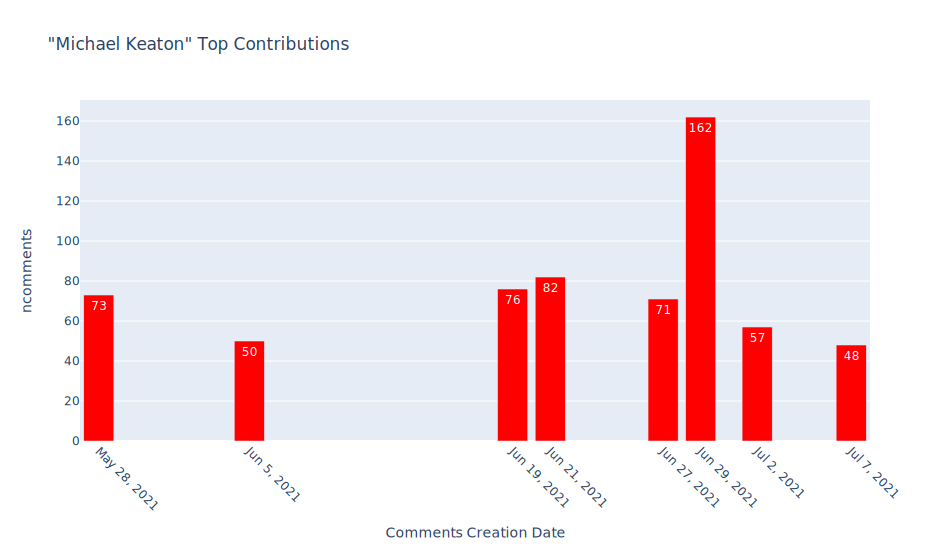

In [66]:
helpers.contr_peaks(df_comments, "Michael Keaton", n=8, threshold=0)

In [67]:
df_comments[df_comments.username == 'Michael Keaton'].text.value_counts().head()

ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ        1584
ًں’•ًں’“thanks for your utmost love which has brought me this far it has been a hard time for me but your support got me going where are you watching from?ًں’•                                                                                                                                                                                            446
â‌¤ï¸ڈthanks for your unconditional love and support you have been showing me it has been a difficult time for me but your love got me standing i can't appreciate enough the love of fans who are standing by me through thick and thin private message me on my personal account on telegram @johnnydepp

In [68]:
neg_users = neg_users | {"Michael Keaton"}

<a id='most_likes'></a>
>## Users with the Most Likes
> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes"><b>Users with the Most Likes</b></a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

In [69]:
df_nlikes = df_comments.groupby(['username']).agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('nlikes', ascending=False)

df_nlikes.head(15)

,username,ncomments,nreplies,nlikes
527214,Mary Shephard,1,486.0,179715.0
506112,Madison Beer,1,498.0,121555.0
95669,Baby Bunny,1,441.0,70997.0
806492,Tom Harlock,43,484.0,60284.0
416661,KAT PURFECT,4,487.0,54886.0
527481,Maryam,9,279.0,51396.0
874222,_thesmellofnewsneakers _,2,470.0,48562.0
459263,LadyDominion,1,445.0,46526.0
310768,Gus Johnson,1,134.0,43136.0
108083,BetweenTheRaindrops,129,316.0,42848.0


In [70]:
myset = {'KAT PURFECT', 'Maryam', '_thesmellofnewsneakers _', 'BetweenTheRaindrops', 'tim lister', 'Eric Wilson', 'Jo Gauthier'} 

In [71]:
colors = []
for user in df_nlikes.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


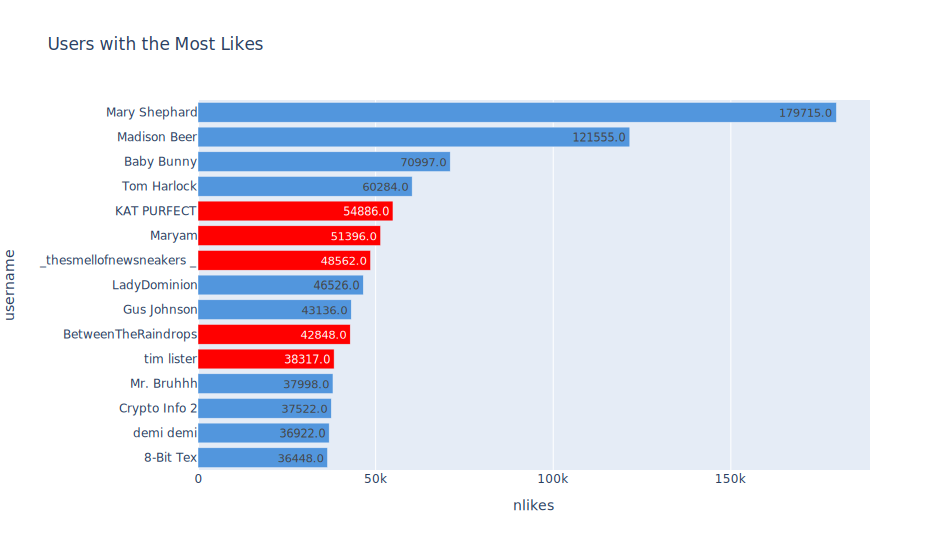

In [72]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_nlikes[['username', 'nlikes']].head(15), "Users with the Most Likes", c=colors)

In [73]:
df_comments[df_comments.username == 'Mary Shephard'].text.value_counts().head()

she could steal my man and i would be mad that she wanted him and not me    1
Name: text, dtype: int64

In [74]:
# df_comments[df_comments.username == 'Madison Beer'].text.value_counts().head()

In [75]:
# df_comments[df_comments.username == 'Baby Bunny'].text.value_counts().head()

In [76]:
# df_comments[df_comments.username == 'Tom Harlock'].text.value_counts().head(10)

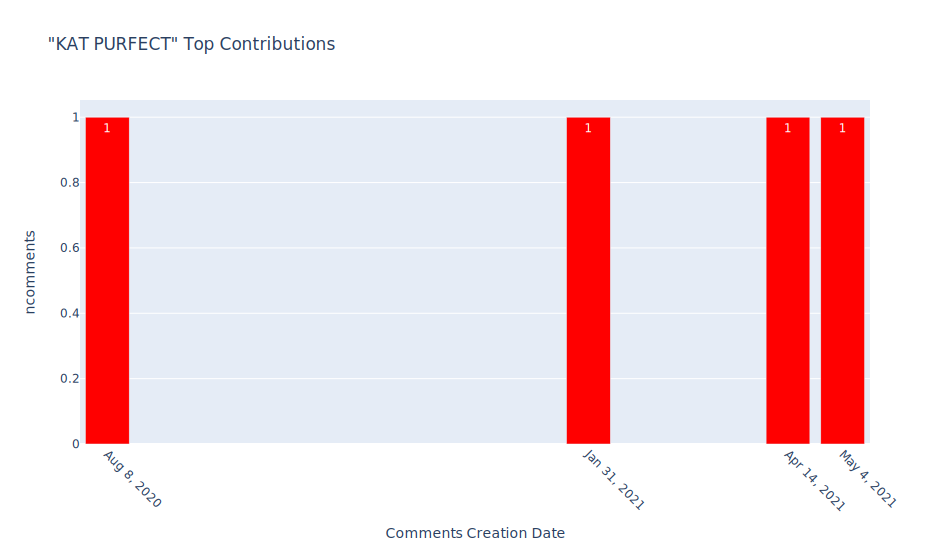

In [77]:
helpers.contr_peaks(df_comments, "KAT PURFECT", n=5, threshold=0)

In [78]:
df_comments[df_comments.username == 'KAT PURFECT'].text.value_counts().head(10)

that's wot sociaphaphs do                                                                     1
sociapath                                                                                     1
ah seems narcissistic and a button presser 2me right from the start truth always comes out    1
no woman should hit a man just like no man should hit a woman                                 1
Name: text, dtype: int64

In [79]:
neg_users = neg_users | {"KAT PURFECT"}

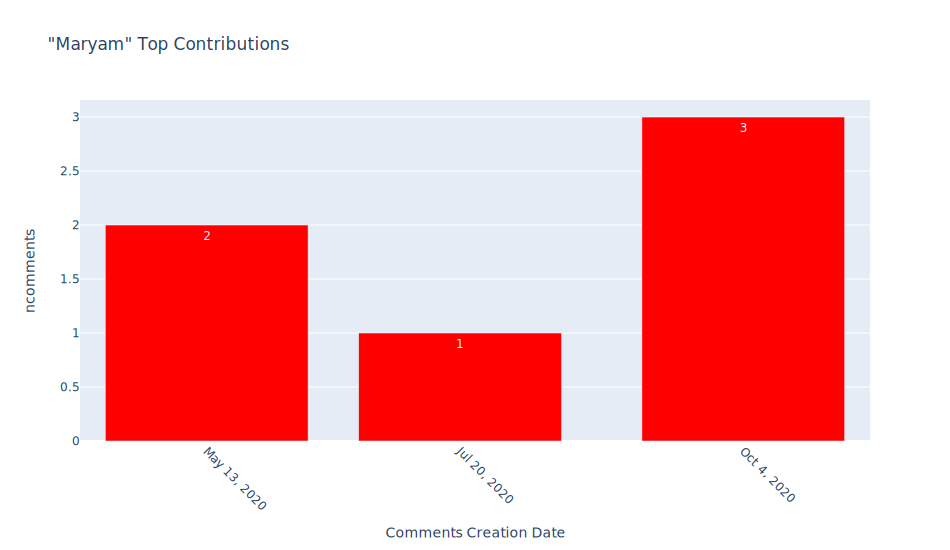

In [80]:
helpers.contr_peaks(df_comments, "Maryam", n=3, threshold=0)

In [81]:
df_comments[df_comments.username == 'Maryam'].text.value_counts().head(10)

i want another puppy cuz i already have a puppy and i want another one!hehrh                                                                                                                       1
nice shoes where is ur fucking proof? amber is a malicious disgusting woman men can be abused she chopped off his fucking finger and tried to kill him tarnished his name and got his jobs gone    1
@kelli danielle haha i see                                                                                                                                                                         1
this music keep playing in my head wtfًںک£â‌¤ًں”¥                                                                                                                                                  1
amber is truly a natural beauty ( if that's her real face)                                                                                                                                         1
@gachamuu yup  

In [82]:
neg_users = neg_users | {"Maryam"}

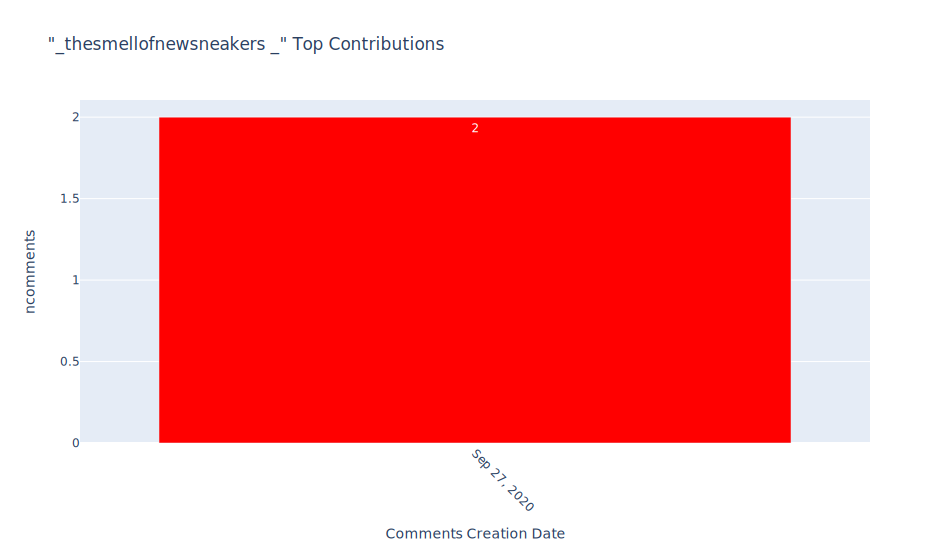

In [83]:
helpers.contr_peaks(df_comments, "_thesmellofnewsneakers _", n=3, threshold=0)

In [84]:
df_comments[df_comments.username == '_thesmellofnewsneakers _'].text.value_counts().head(10)

yeah her eyes are not open all the way like she is trying to look sad       1
guys please stop insulting amber heard i'm tired of liking your comments    1
Name: text, dtype: int64

In [85]:
neg_users = neg_users | {"_thesmellofnewsneakers _"}

In [86]:
df_comments[df_comments.username == 'LadyDominion'].text.value_counts().head(10)

disney's got a lot of balls to think people will watch pirates of the caribbean without johnny depp    1
Name: text, dtype: int64

In [87]:
# df_comments[df_comments.username == 'Gus Johnson'].text.value_counts().head(10)

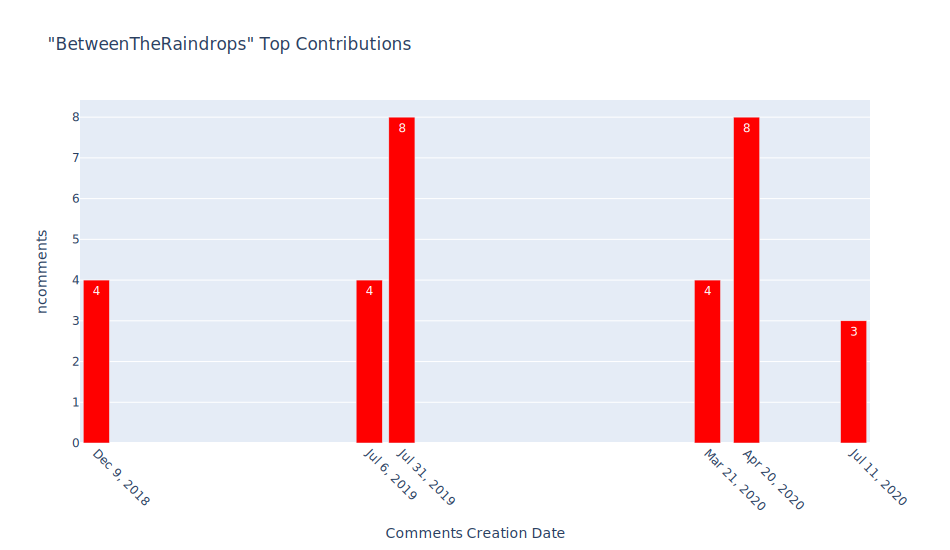

In [88]:
helpers.contr_peaks(df_comments, "BetweenTheRaindrops", n=6, threshold=0)

In [89]:
df_comments[df_comments.username == 'BetweenTheRaindrops'].text.value_counts().head(60)

ew not that abuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [90]:
neg_users = neg_users | {"BetweenTheRaindrops"}

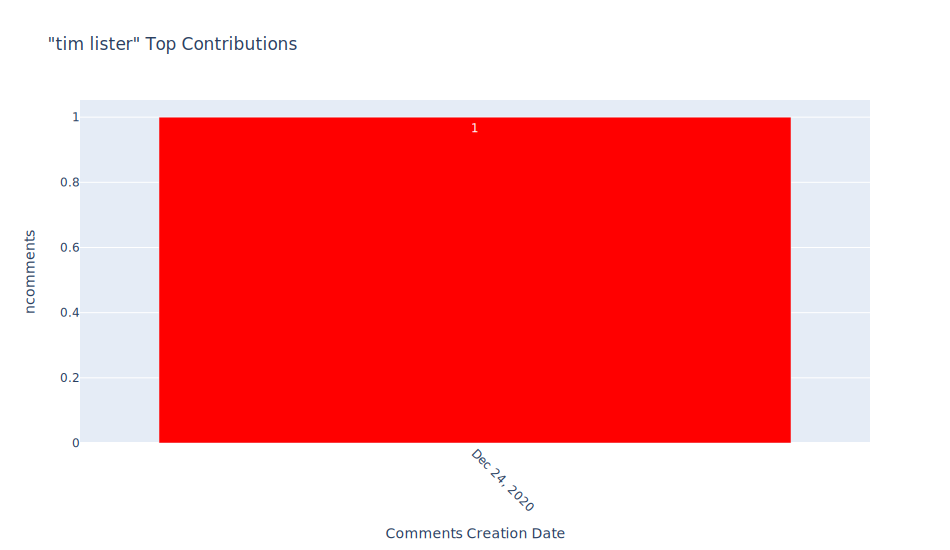

In [91]:
helpers.contr_peaks(df_comments, "tim lister", n=8, threshold=0)

In [92]:
df_comments[df_comments.username == 'tim lister'].text.value_counts().head()

they won't believe you because you are a man she is not a victim    1
Name: text, dtype: int64

In [93]:
neg_users = neg_users | {"tim lister"}

In [94]:
# df_comments[df_comments.username == 'Mr. Bruhhh'].text.value_counts().head()

In [95]:
# df_comments[df_comments.username == 'Crypto Info 2'].text.value_counts().head()

In [96]:
# df_comments[df_comments.username == 'demi demi'].text.value_counts().head(10)

In [97]:
# df_comments[df_comments.username == '8-Bit Tex'].text.value_counts().head(10)

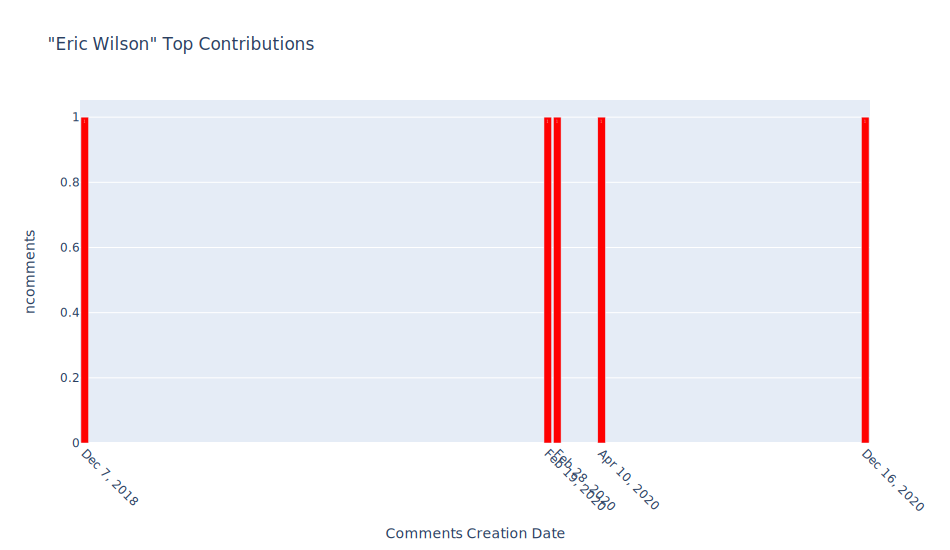

In [98]:
helpers.contr_peaks(df_comments, "Eric Wilson", n=8, threshold=0)

In [99]:
df_comments[df_comments.username == 'Eric Wilson'].text.value_counts().head(10)

the war is not coming to the surface                      1
amber heard will take care of him                         1
his mom was single mom so the kids were all screwed up    1
why give this abuser screentime she is not a victim       1
disney's been out for40years                              1
Name: text, dtype: int64

In [100]:
neg_users = neg_users | {"Eric Wilson"}

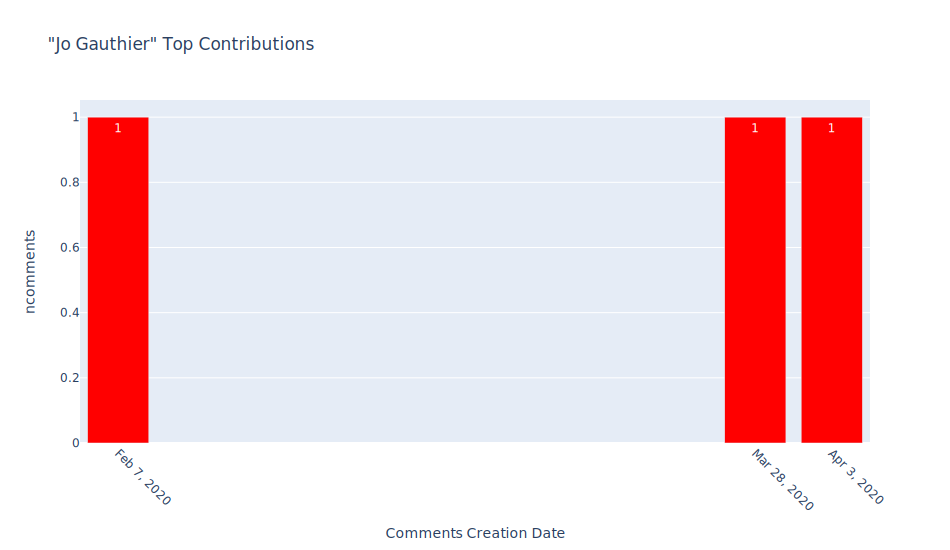

In [101]:
helpers.contr_peaks(df_comments, "Jo Gauthier", n=8, threshold=0)

In [102]:
df_comments[df_comments.username == 'Jo Gauthier'].text.value_counts().head(10)

im canceling her if i ever see her name on a movie premiere i aint watching it who's with me?    1
if she knew knew johny had the tapes she is a very dumb bitch                                    1
true this is making sense                                                                        1
Name: text, dtype: int64

In [103]:
neg_users = neg_users | {"Jo Gauthier"}

In [104]:
# df_comments[df_comments.username == 'Ty Y'].text.value_counts().head(10)

<a id='most_replies'></a>
>## Users with the Most Replies
> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies"><b>Users with the Most Replies</b></a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

In [105]:
df_nreplies = df_comments.groupby(['username']).agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('nreplies', ascending=False)

df_nreplies.head(15)

,username,ncomments,nreplies,nlikes
590452,Nerdette's NewsStand,1024,1417.0,5474.0
916131,eHacker,8343,1411.0,14892.0
646613,PureSparkles22,1160,1369.0,32298.0
184876,DELCARAJO TV,82,1327.0,10281.0
785925,ThatUmbrellaGuy,176,1285.0,12186.0
795827,TheQuartering,33,994.0,8549.0
343333,Incredibly Average,237,924.0,17318.0
809154,Top 10 Beyond The Screen,14,883.0,3575.0
344129,InformOverload,37,846.0,2580.0
408266,Judy Alexander,386,772.0,14450.0


In [106]:
myset = {'Just Some Guy without a Mustache', 'Vampire Daddy', 'PureSparkles22', 'InformOverload', 
         'Top 10 Beyond The Screen', 'ThatUmbrellaGuy', 'PureSparkles22', 'TheQuartering', 'Judy Alexander', 
         'lisa richards', 'May Jones'} 

In [107]:
colors = []
for user in df_nreplies.head(15)['username']:
    if user in myset:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


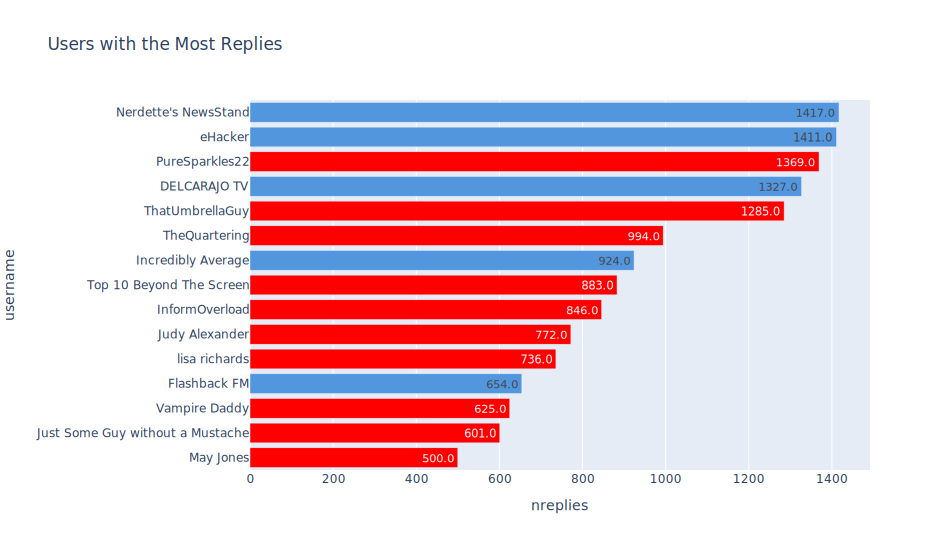

In [108]:
print('\nNote: Negatively commenting users are highlighted in "red"')
helpers.barh(df_nreplies[['username', 'nreplies']].head(15), "Users with the Most Replies", c=colors)

In [109]:
# to get the users investigated before
set(df_nreplies.username.head(15)) & set(df_nlikes.username.head(15)) | \
set(df_nreplies.username.head(15)) & set(df_top_users.username.head(15))

{'PureSparkles22', 'eHacker'}

In [110]:
# # to get the users not investigated before
# set(df_nreplies.username.head(15)) - set(df_nlikes.username.head(15)) - set(df_top_users.username.head(15))


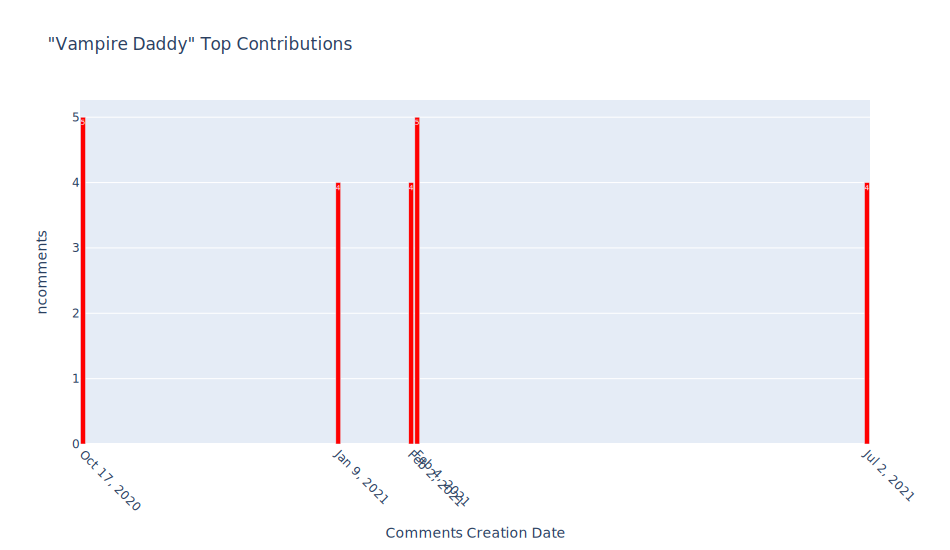

In [111]:
helpers.contr_peaks(df_comments, "Vampire Daddy", n=5, threshold=0)

In [112]:
df_comments[df_comments.username == "Vampire Daddy"].text.value_counts().head(60)

warner bros is really screwing itself over and doesn't even realize it i can't believe things have gotten this far                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       1
of course amber never takes any responsibility for her own actions it's always somebody else's fault ًں™„ًں™„ًں™„ًں™„ًں™„    

In [113]:
neg_users = neg_users | {"Vampire Daddy"}

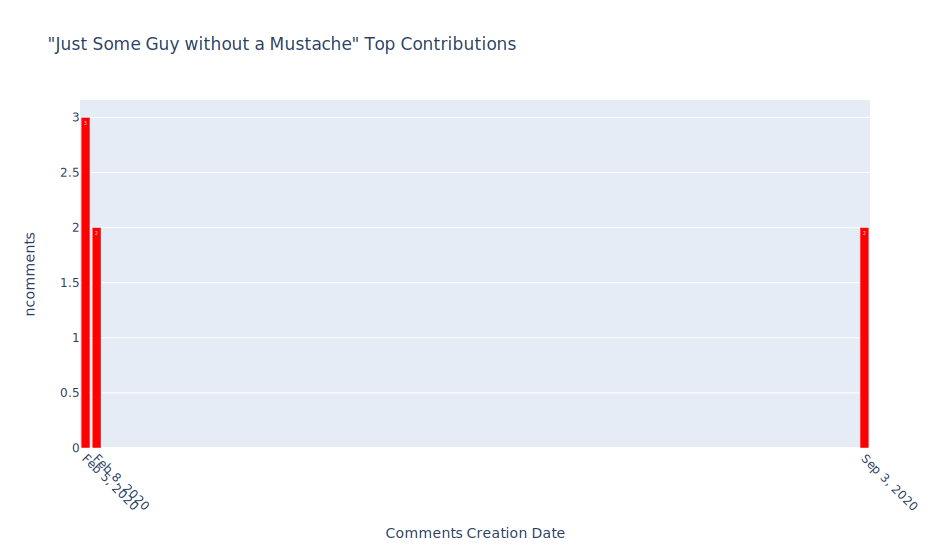

In [114]:
helpers.contr_peaks(df_comments, "Just Some Guy without a Mustache", n=3, threshold=0)

In [115]:
df_comments[df_comments.username == "Just Some Guy without a Mustache"].text.value_counts().head(60)

plus emilia clarke is the mother of dragons and a superior actress overall                                                                                                                               1
i really feel sorry for johnny that he has to deal with a monster like her                                                                                                                               1
she is an actual monster crazy how people are still defending her                                                                                                                                        1
wow what an abusive witch                                                                                                                                                                                1
they can replace her with jack black as mera and i''d be happy anything but her                                                                                                             

In [116]:
neg_users = neg_users | {"Just Some Guy without a Mustache"}

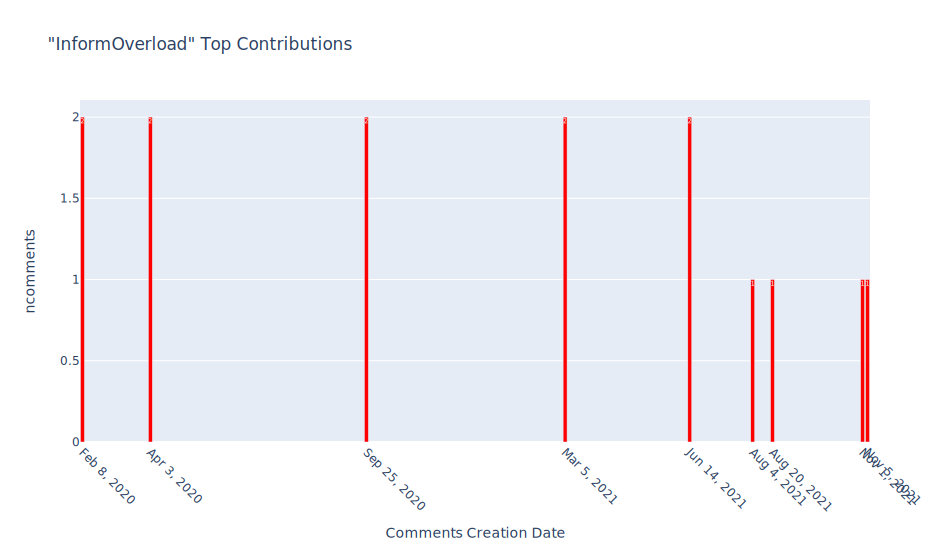

In [117]:
helpers.contr_peaks(df_comments, "InformOverload", n=9, threshold=0)

In [118]:
df_comments[df_comments.username == "InformOverload"].text.value_counts().head(60)

what are your thoughts?                                                                                                                                                                                                                                               12
how much prison time do you think she deserves for this? click here for an update ًں‘‰ https://wwwyoutubecom/watch?v=xce6qh5kz8q                                                                                                                                       1
do you think amber heard will be in aquaman 2? 00:00 intro 00:11 britney spears father reacts 01:21 cephalopod passes cognitive test 03:32 mr potato head cancelled 04:56 texas storm hero 06:10 amber heard aquaman 2 drama 08:07 reading comments 09:14 bloopers     1
check out the part 1 of this series for more royal secrets exposed ًں‘‰ https://wwwyoutubecom/watch?v=cce53lzie5c                                                                                            

In [119]:
neg_users = neg_users | {"InformOverload"}

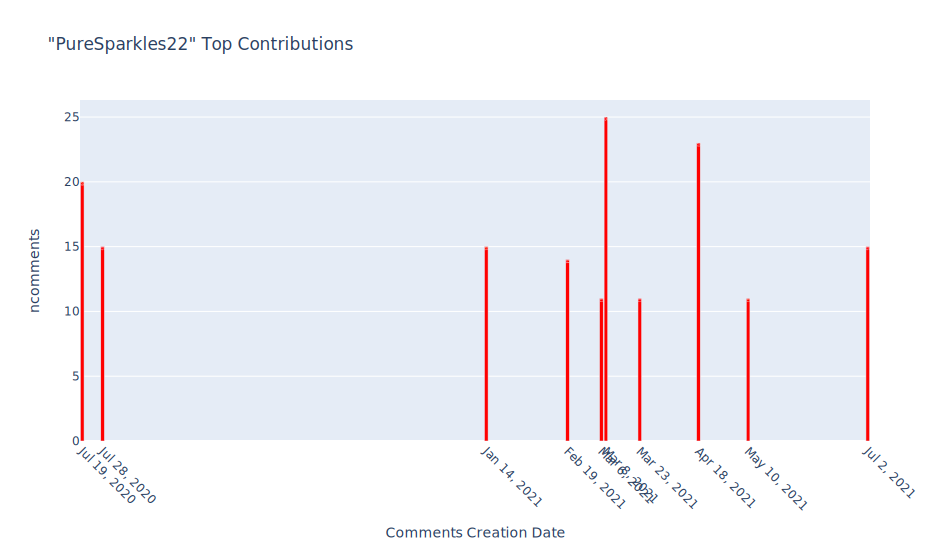

In [120]:
helpers.contr_peaks(df_comments, "PureSparkles22", n=10, threshold=0)

In [121]:
df_comments[df_comments.username == "PureSparkles22"].text.value_counts().head(60)

she is a narcissist                                                                                                                                                                                                                                                                                   4
she is an abuser                                                                                                                                                                                                                                                                                      4
#amberheardisanabuser                                                                                                                                                                                                                                                                                 3
abuser heard                                                                                                    

In [122]:
neg_users = neg_users | {"PureSparkles22"}

In [123]:
# df_comments[df_comments.username == "Nerdette's NewsStand"].text.value_counts().head(60)

- i am fine thank you i apologize i followed the case everyday but couldn't get videos out the way i wanted during that time i'm working on visuals and things to make them up to standard and hopefully won't be long
- yes i have read and studied each and every document since this started almost 4 years ago
- ok depp is the victim   
- this was in 2016 when she was making the initial claims against depp so she was actually facing no charges then she was getting questioned to test the accuracy of her claims and to clear his name she is currently being sued by johnny for defamation and is attempting for the 3rd or 4th time to get the case dismissed so as of right nowno consequences she is still a un human ambassador has a lucrative loreal contract and is still has her franchise role as mera in the aquaman movies she has locked down her instagram comments for the past month and a halfand is going about her life as if none of this is happening    1


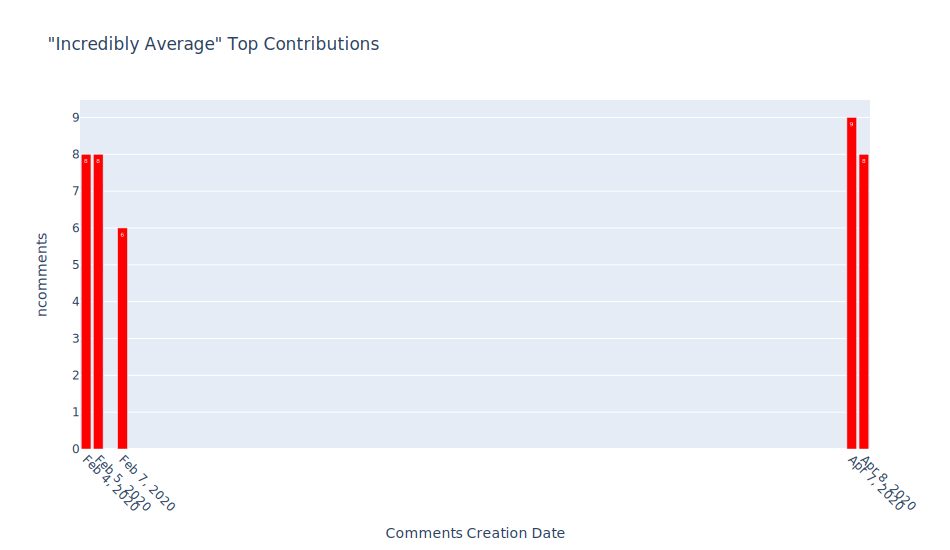

In [124]:
helpers.contr_peaks(df_comments, "Incredibly Average", n=5, threshold=0)

- ok depp is the victim
- but her admitting to hitting him on multiple occasions is you must have missed that 

In [125]:
df_comments[df_comments.username == 'Incredibly Average'].text.value_counts().head(60)

i agree i have no professional insight but these things just rubbed me the wrong way so much of her mannerisms were bothersome to me and i just don't know exactly how to articulate it                                                                                                                                                                                                                                                                                                                                                                                                                           1
what? i reported one video that literally took it and reposted itwithout anything added i've tried to promote and have shared many others who have offered their own take while still using this video you could not be more off base with your claim                                                                                                                                                               

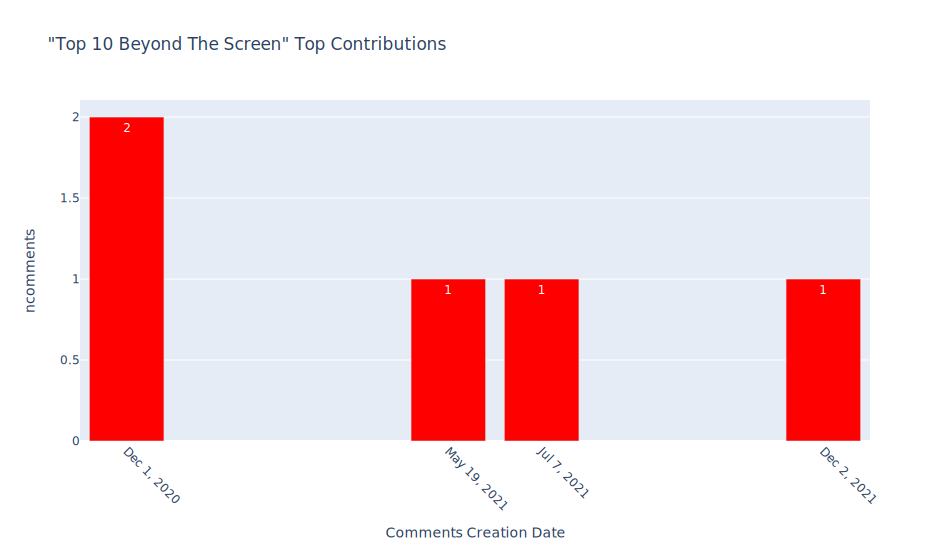

In [126]:
helpers.contr_peaks(df_comments, "Top 10 Beyond The Screen", n=4, threshold=0)

In [127]:
df_comments[df_comments.username == 'Top 10 Beyond The Screen'].text.value_counts().head(10)

what is your favorite couple in hollywood?                              1
how do you feel about amber heard?                                      1
do you think hollywood should hire amber heard?                         1
what are your thoughts on amber heard and johnny depp?                  1
yeeeeeee                                                                1
do you think amber heard should be removed from aquaman 2?              1
who's side are you on?                                                  1
what are your views on the entire johnny depp/amber heard situation?    1
do you think amber heard should be banned from hollywood?               1
who is your favorite hollywood actor?                                   1
Name: text, dtype: int64

In [128]:
neg_users = neg_users | {"Top 10 Beyond The Screen"}

- yeah there's two trials jd vs the sun decided now and a direct jd vs ah it was supposed to be jan but looks like it may get pushed to mid year  
- social justice warrior was a term a specific type of crazy created for themselves to backpat how stunning and brave they were they were the very people that spearheaded this wave of cancel culture what they preach is not about equality or merit its about advantage namely advantage for self 
- if new case documents or evidence additions aren't new what exactly is? this isnt depp vs sun 2020; its the prep for depp vs ah 2021 case which is noted in the 1st 10 seconds of the video to avoid confusion it is also in the tags to note although there is no existing hashtag to differentiate; i tried deppheard2021 but it doesn't seem to track according to tube buddy as the case builds we are getting new documents daily sometimes multiples a day as well as adam waldmann his lawyer adding sneak peaks at new items that's what this is: waldman posted a piece of evidence that will be added which hadn't been showcased we don't even have a submitted document for it and it shows ah/ah's sister losing everyone around them i also posted another video last night on the sophie case if depp isn't your flavor its up too thanks                                                                                 

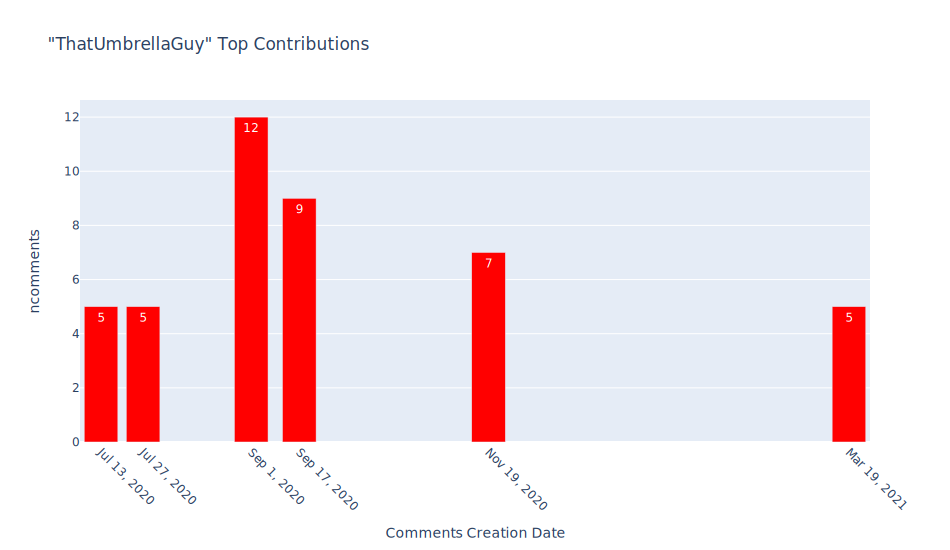

In [129]:
helpers.contr_peaks(df_comments, "ThatUmbrellaGuy", n=6, threshold=0)

In [130]:
df_comments[df_comments.username == 'ThatUmbrellaGuy'].text.value_counts().head(60)

i'll make it work for sure one good thing if it waits untiljan 2021 is it gives us all a chance to really decide if anything else is missed in those documents                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
you talking casey anthony?                                                                                                                                                                                                                                    

In [131]:
neg_users = neg_users | {"ThatUmbrellaGuy"}

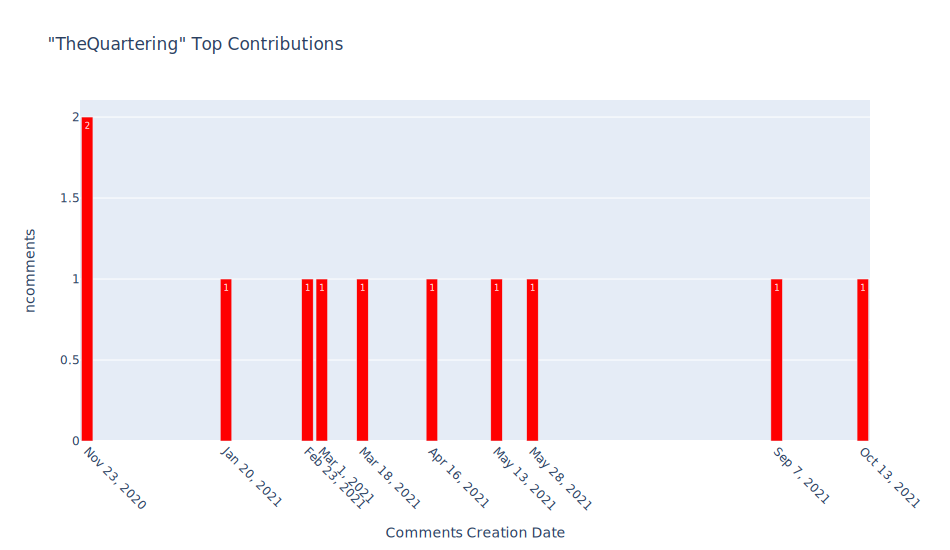

In [132]:
helpers.contr_peaks(df_comments, "TheQuartering", n=10, threshold=0)

In [133]:
df_comments[df_comments.username == 'TheQuartering'].text.value_counts().head(60)

thanks so much for always smashing that like button! subscribe today so we can hit 1 million & save a huge bundle on a sweet new displate only when you use this link! https://displatecom/thequartering?art=5e0b6fe4e87b0                                                                                                                               2
help support the channel & protect your data with a vpn! get private internet access! https://privateinternetaccesscom/thequartering3                                                                                                                                                                                                                    2
make sure you smash like on this video! it seems the only people backing depp are here on youtube so share this out!                                                                                                                                                                                              

In [134]:
neg_users = neg_users | {"TheQuartering"}

In [135]:
# df_comments[df_comments.username == 'DELCARAJO TV'].text.value_counts().head(10)

In [136]:
# df_comments[df_comments.username == 'Flashback FM'].text.value_counts().head(10)

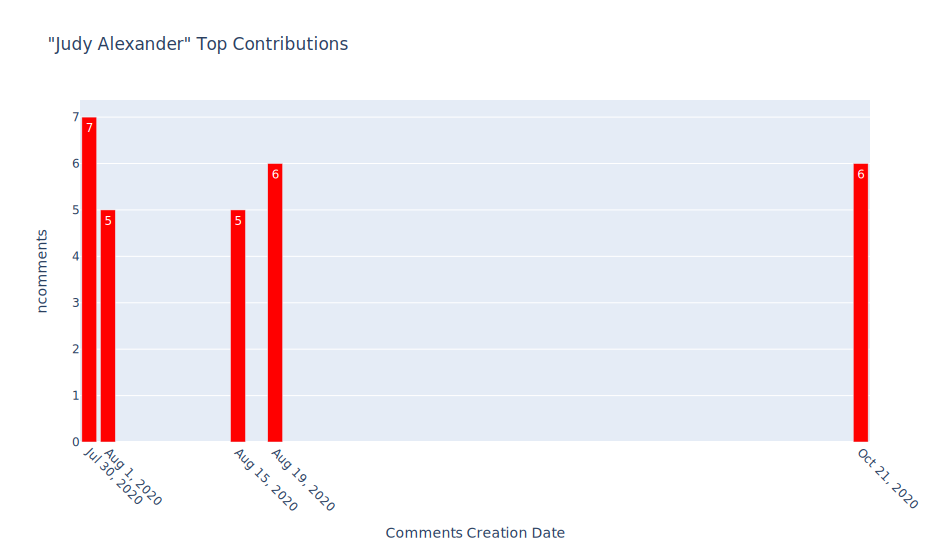

In [137]:
helpers.contr_peaks(df_comments, "Judy Alexander", n=5, threshold=0)

In [138]:
df_comments[df_comments.username == 'Judy Alexander'].text.value_counts().head(60)

boom! ambers career just blew up nobody will hire her now she just blacklisted herself                                                                                                                                                                                                                                                 2
i always thought that johnny would be in the ground right now if he hadn't left she would claim it was an accident he dodged a bullet                                                                                                                                                                                                  2
just proves what i've known all along johnny is a good man                                                                                                                                                                                                                                                                             1
i think that 

In [139]:
neg_users = neg_users | {"Judy Alexander"}

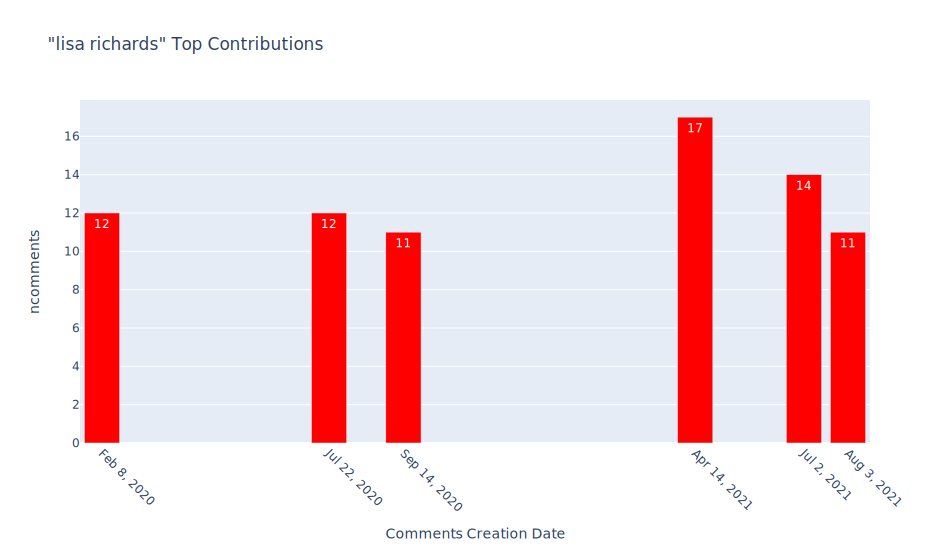

In [140]:
helpers.contr_peaks(df_comments, "lisa richards", n=6, threshold=0)

In [141]:
df_comments[df_comments.username == 'lisa richards'].text.value_counts().head(60)

two words: joan crawford                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [142]:
neg_users = neg_users | {"lisa richards"}

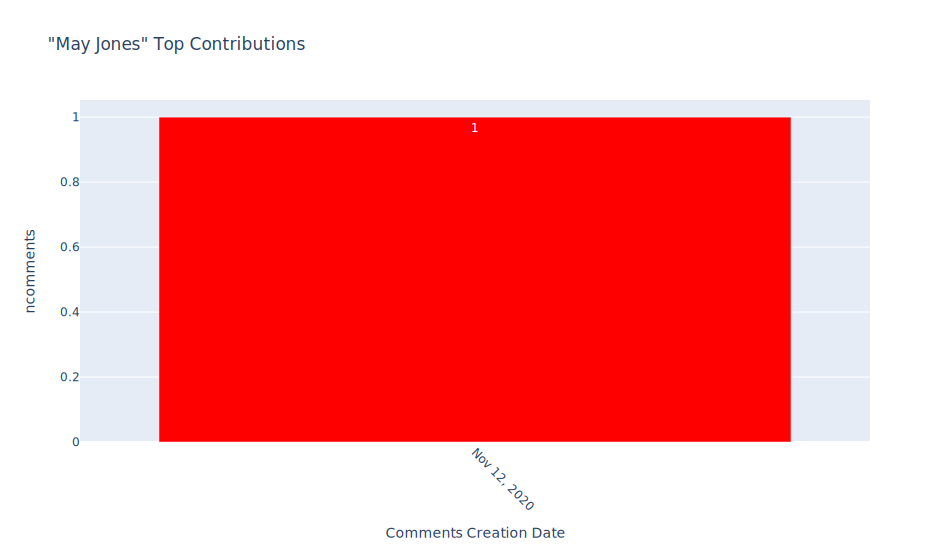

In [143]:
helpers.contr_peaks(df_comments, "May Jones", n=6, threshold=0)

In [144]:
df_comments[df_comments.username == 'May Jones'].text.value_counts().head(10)

say it with me kids: the abuser isn't determined by the gender    1
Name: text, dtype: int64

In [145]:
neg_users = neg_users | {"May Jones"}

In [146]:
# df_comments[df_comments.username == 'Funeral bug'].text.value_counts().head(10)

In [147]:
# df_comments[df_comments.username == 'Stranger In the Alps'].text.value_counts().head(10)

<a id='neg_users'></a>
>## Users with Negative Comments (All Contributions)
> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users"><b>Users with Negative Comments</b></a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

In [148]:
neg_users_list = list(neg_users)

In [149]:
# filter the dataframe on the users commenting in a negative way
df_neg_users = df_comments.query(' username == @neg_users_list ')

In [150]:
df = df_neg_users.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df.shape)
df.sort_values('ncomments', ascending=False).head(15)

(228339, 4)


,username,ncomments,nreplies,nlikes
85393,Johnny Depp,15986,16.0,2572.0
76534,JOHNNY DEPP,3921,0.0,726.0
99373,LaraCroftEyes1,3270,73.0,4445.0
117351,Michael Keaton,3148,0.0,556.0
146500,Rock Candy,2455,302.0,6078.0
103112,Lindsey Depp,2432,232.0,2626.0
145815,Rob's Rules,2023,60.0,2908.0
85478,Johnny depp,1885,0.0,124.0
105117,Lorri Holder,1380,308.0,8743.0
139212,PureSparkles22,1160,1369.0,32298.0


### A Heat Map for the Negative Users Contributions 


Note: The Peaks on Feb, Dec 2020



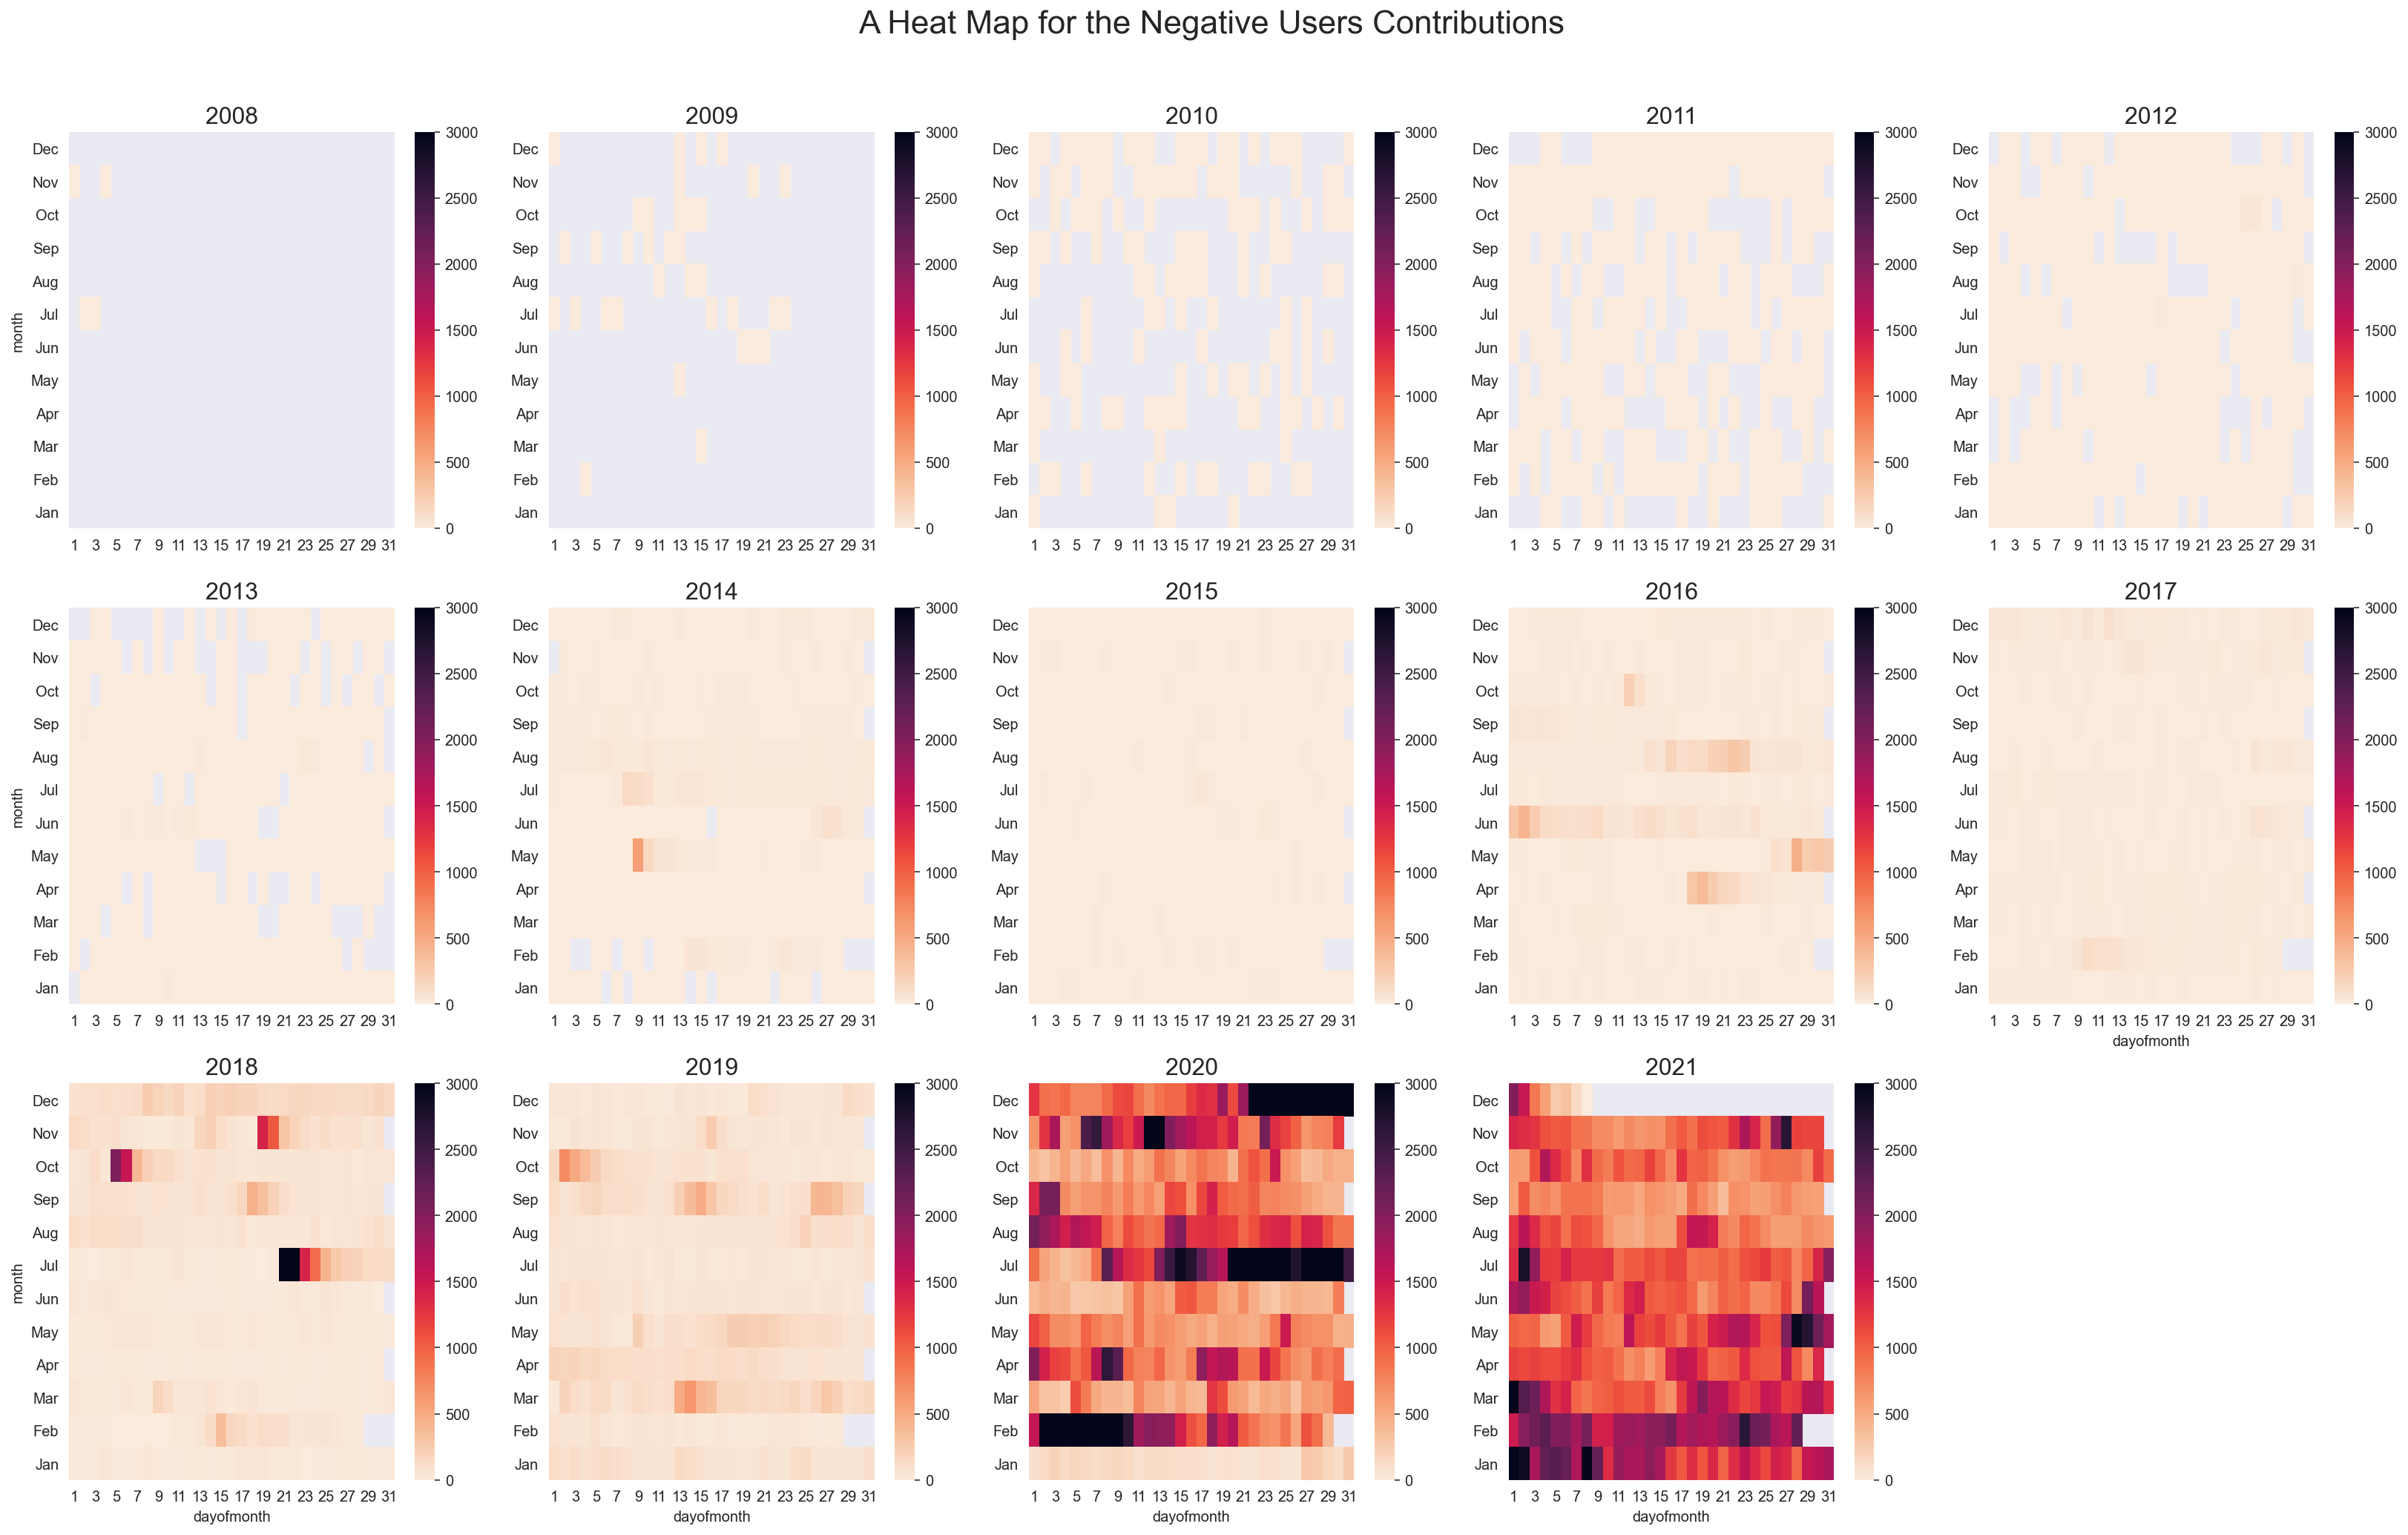

In [151]:
neg_users_daily = df_neg_users.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Users Contributions'
helpers.facet_heat(neg_users_daily, title, n_col=5, vmax=3000)

### Top Users with Negative Comments (All Contributions)

In [152]:
df_nneg_users = df_neg_users.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg_users.shape)
df_nneg_users = df_nneg_users.sort_values('ncomments', ascending=False)
df_nneg_users.head(15)

(228339, 4)


,username,ncomments,nreplies,nlikes
85393,Johnny Depp,15986,16.0,2572.0
76534,JOHNNY DEPP,3921,0.0,726.0
99373,LaraCroftEyes1,3270,73.0,4445.0
117351,Michael Keaton,3148,0.0,556.0
146500,Rock Candy,2455,302.0,6078.0
103112,Lindsey Depp,2432,232.0,2626.0
145815,Rob's Rules,2023,60.0,2908.0
85478,Johnny depp,1885,0.0,124.0
105117,Lorri Holder,1380,308.0,8743.0
139212,PureSparkles22,1160,1369.0,32298.0


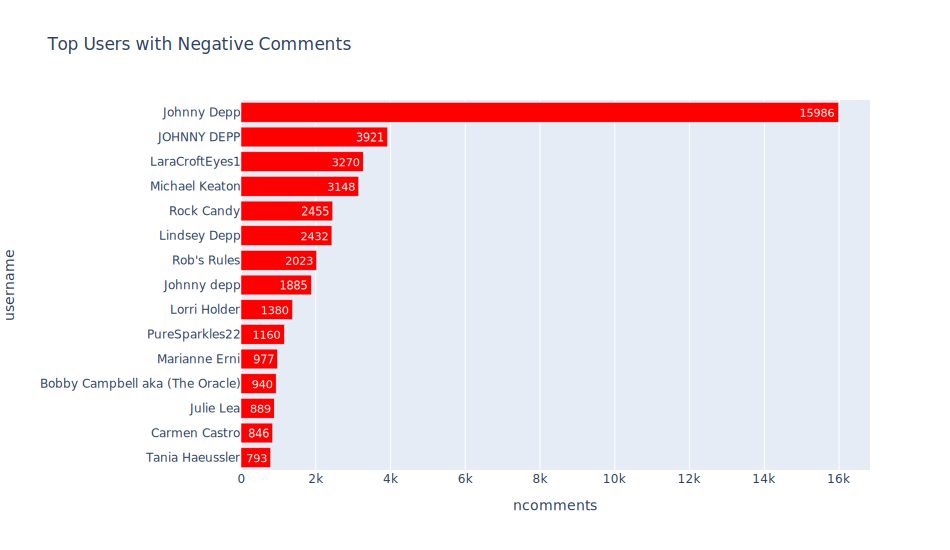

In [153]:
helpers.barh(df_nneg_users[['username', 'ncomments']].head(15), 'Top Users with Negative Comments', threshold=0)

### Negative Users Contributions on Each Date

In [154]:
df = df_neg_users.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df.head(15)

,date,username,ncomments,nlikes,nreplies
560030,2021-05-31,Johnny Depp,397,37.0,0.0
526186,2021-04-18,Johnny Depp,293,30.0,0.0
524513,2021-04-16,Johnny Depp,272,24.0,0.0
566088,2021-06-07,Johnny Depp,270,21.0,0.0
577633,2021-06-27,Johnny Depp,245,14.0,0.0
572628,2021-06-17,Johnny Depp,228,6.0,0.0
666220,2021-11-24,Johnny Depp,200,26.0,0.0
558940,2021-05-30,Johnny Depp,196,29.0,0.0
523958,2021-04-15,Johnny Depp,192,20.0,0.0
520298,2021-04-08,Johnny Depp,189,29.0,0.0


### Negative Users Comments Peak Dates

In [155]:
negative_users_dates = df_neg_users.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

negative_users_dates.head(15)


,date,ncomments,nlikes,nreplies
3569,2020-12-27,14270,185794.0,1117.0
3565,2020-12-23,12005,260510.0,2079.0
3568,2020-12-26,11033,172716.0,747.0
3566,2020-12-24,10698,246675.0,1427.0
3570,2020-12-28,9295,107474.0,932.0
3242,2020-02-04,8095,230598.0,5713.0
3571,2020-12-29,7815,104088.0,1163.0
3245,2020-02-07,6850,203238.0,5519.0
3572,2020-12-30,6347,108994.0,1007.0
3411,2020-07-22,6237,134708.0,3729.0


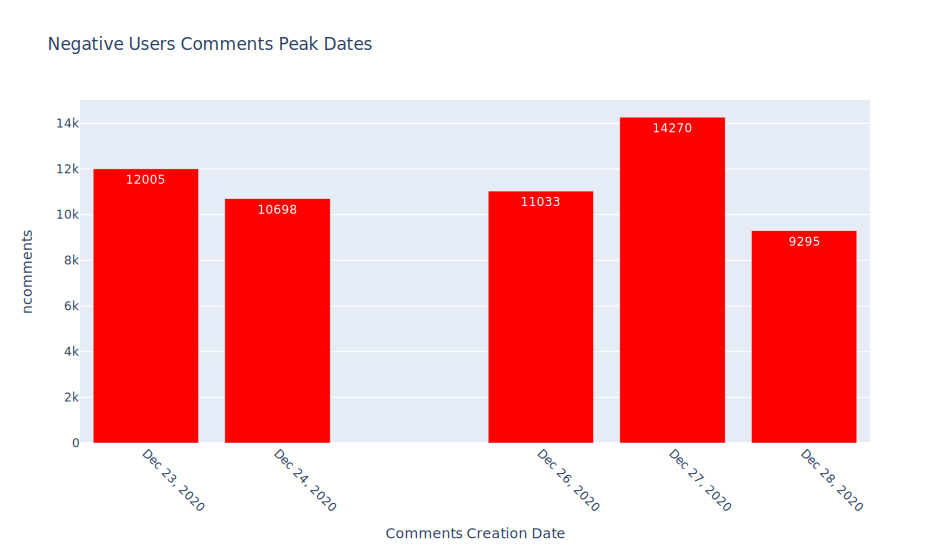

In [156]:
helpers.bar_peaks(negative_users_dates[['date', 'ncomments']].head(5), 
                  'Negative Users Comments Peak Dates', threshold=0)

<br>

<a id='nans'></a>
>## NaNs in Usernames
> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans"><b>NaNs in Usernames</b></a></li>
 <li><a href="#same_date">Top Users Commented on The Same Dates</a></li>
 </ul>

The NaNs in username --> either means deleted or banned accounts

In [157]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 0
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2173771
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [158]:
df_comments[pd.isnull(df_comments.username)].head(60)

,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
6900,rB7ONnfIjaI,T5Sym8Qakf8hWNDKuPeFdG5Le00,UgwvRMnTy9QEqXKy0AZ4AaABAg,hope we can sing this as well as she can in ve...,NaN,UCilk5MwN4VKdh-FR2Dum-Zg,0.0,2013-08-26 03:13:12+00:00,2013-08-26 03:13:12+00:00,0.0,NaN,comment,none,none,none,2013,2013-08-26,Aug,26,3
21725,Khwwml8xY_M,6V3P_cGTEeAgZUVR9EDr8-GRzXc,Ugjw3ibwcjfpgngCoAEC,i just wanted to recommend a product/vitamin t...,NaN,NaN,0.0,2014-05-10 20:33:53+00:00,2014-05-10 20:33:53+00:00,0.0,NaN,comment,none,none,none,2014,2014-05-10,May,10,20
34227,Yj6V_a1-EUA,D0EE6qUzbCSFYEQq-bFHggaNMps,UgjC56ujVvK3yngCoAEC,beautiful! both song and video!,NaN,NaN,2.0,2014-07-14 10:07:24+00:00,2014-07-14 10:07:24+00:00,0.0,NaN,comment,none,none,none,2014,2014-07-14,Jul,14,10
83652,Khwwml8xY_M,NKdXfJHh4B071resgmZGadwbN0U,Ugit6l1WoEh2PHgCoAEC,does anyone know a good setting powder from th...,NaN,NaN,0.0,2016-11-18 03:40:01+00:00,2016-11-18 03:40:01+00:00,1.0,NaN,comment,none,none,none,2016,2016-11-18,Nov,18,3
98756,N5gO_pciDDg,aiUUppeMkrevAdCAbV4Erp7JYQ4,Ugi2kXFHNlN0IXgCoAEC,amber heard has not lost any roles or turned t...,NaN,NaN,3.0,2016-06-03 08:05:02+00:00,2016-06-03 08:05:02+00:00,5.0,NaN,comment,none,none,none,2016,2016-06-03,Jun,3,8
174831,Bz-TzGR9tP0,3voAEa8up7sH3L00sSghqHyoa-s,UgwjDOflopkfsqVK0qx4AaABAg,nice,NaN,NaN,0.0,2018-07-22 03:18:23+00:00,2018-07-22 03:18:23+00:00,0.0,NaN,comment,none,none,none,2018,2018-07-22,Jul,22,3
174833,Bz-TzGR9tP0,9XWu8yHhnpkr4KR1xIZL37gW-q4,UgwJwhrP3B4pQ3XyTiV4AaABAg,nice,NaN,NaN,0.0,2018-07-22 03:17:49+00:00,2018-07-22 03:17:49+00:00,0.0,NaN,comment,none,none,none,2018,2018-07-22,Jul,22,3
178077,b9V3Pj47x4c,o78wGHUTzXfbxmIzORJUC6T3b3Q,UgwO02f14C36oG9MLgh4AaABAg,in supergirl series when flash race against su...,NaN,NaN,0.0,2018-05-17 06:22:08+00:00,2018-05-17 06:22:08+00:00,0.0,NaN,comment,none,none,none,2018,2018-05-17,May,17,6
189131,WDkg3h8PCVU,wpuZenT3Kc9a_b7uiIHJOjGA9OU,UgyytpCTmOIxOpJaU114AaABAg,i can't see her pain https://wwwyoutubecom/wat...,NaN,NaN,0.0,2018-07-26 18:23:33+00:00,2018-07-26 18:23:33+00:00,0.0,NaN,comment,none,none,none,2018,2018-07-26,Jul,26,18
193153,WDkg3h8PCVU,psfskEv6cPlhKLI8K7EisTEdHZs,Ugw9WXuGLPZE7WdJOB14AaABAg,last scene osmm yar ًں’‹ًں’‹ًں’—ًں’—,NaN,NaN,1.0,2018-07-24 13:08:38+00:00,2018-07-24 13:08:38+00:00,0.0,NaN,comment,none,none,none,2018,2018-07-24,Jul,24,13


In [159]:
df_comments[pd.isnull(df_comments.username)].text.value_counts()

nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2
the woman seems like a straight up karen                                                                                                                                                                                                                                                                                                                                                                                                                                                              1
she had a history of abu

<br>

<a id='same_date'></a>
>## Top Users Commented on The Same Dates | Hours | Times
> <ul>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#neg_users">Users with Negative Comments</a></li>
 <li><a href="#nans">NaNs in Usernames</a></li>
 <li><a href="#same_date"><b>Top Users Commented on The Same Dates</b></a></li>
 </ul>

### Users with The Most Contributions on Each Date

In [160]:
# Top 10 Commanted Users
df_comments.username.value_counts().head(10)

Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Michael Keaton     3148
Rock Candy         2455
Lindsey Depp       2432
Rob's Rules        2023
Johnny depp        1885
Name: username, dtype: int64

In [161]:
df = df_comments.groupby(['date', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df.head(15)

,date,username,ncomments
1445127,2021-05-31,Johnny Depp,397
1370619,2021-04-18,Johnny Depp,293
1366799,2021-04-16,Johnny Depp,272
1459631,2021-06-07,Johnny Depp,270
1485213,2021-06-27,Johnny Depp,245
978519,2020-12-03,Abbey Sharp,233
1473404,2021-06-17,Johnny Depp,228
1670857,2021-11-24,Johnny Depp,200
1441845,2021-05-30,Johnny Depp,196
1365389,2021-04-15,Johnny Depp,192


### Users with The Most Comments on the same hour

In [162]:
df = df_comments.groupby(['date', 'hour', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

print(df.shape)
df.head(15)

(1841765, 4)


,date,hour,username,ncomments
1048832,2020-12-03,22,Abbey Sharp,158
1750361,2021-10-19,6,Cynthia Haney,131
1545545,2021-05-30,7,Johnny Depp,122
1029923,2020-11-22,23,Tyler Brooks,118
1513048,2021-05-18,16,Johnny Depp,113
1053297,2020-12-07,1,Abbey Sharp,112
1467828,2021-04-18,10,Johnny Depp,108
1581034,2021-06-17,21,Johnny Depp,106
1468040,2021-04-18,13,Johnny Depp,105
1564800,2021-06-07,4,Johnny Depp,104


### Users with The Most Comments on the same Time

### <font color='red'>198 Users Commented more than one comment on the same Second</font>

In [163]:
df = df_comments.groupby(['p_dtime', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df = df[df.ncomments > 1]

print(f'Unique number of users: {df.username.nunique()}')
print(f'Total number of comments: {df.ncomments.sum()}')
df.head(15)

Unique number of users: 251
Total number of comments: 622


,p_dtime,username,ncomments
2127796,2021-11-26 15:32:57+00:00,Manjal Jeet,8
2047575,2021-10-11 06:13:33+00:00,Kamlesh Paswan,5
457304,2019-09-21 17:18:15+00:00,Pancreas Dragonheart,5
1435373,2021-01-16 15:56:30+00:00,Pritam Kumar,4
615285,2020-02-19 19:09:58+00:00,Baka Nyx,4
439423,2019-07-16 11:06:22+00:00,lory991959 guzman carrasco,4
601553,2020-02-14 19:09:41+00:00,Valmir Marques,4
481841,2019-11-22 16:17:36+00:00,Saأ؛l Velأ،zquez,4
1013976,2020-08-27 15:44:39+00:00,Gigi Pretty,4
1180863,2020-11-19 04:26:58+00:00,Tania Yaأ±ez Paniagua,4


In [164]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2021-10-11 06:13:33+00:00"]


Identical comments data on the same video



,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
1989960,SkFYO9ZPL8k,VRHu94tybF38ULRvdjSb3x83ZBc,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQPkUUz,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989961,SkFYO9ZPL8k,cmYN4fRNP0q10Ir9CbkHxhpoT0s,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQHRFw2,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989962,SkFYO9ZPL8k,JO860ewVq7c0Usi5K0190uBQbAg,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcQ7afpz,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989963,SkFYO9ZPL8k,uHKR72QYCoj6p0lBCRsqw6vj0cA,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPgzHuw,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6
1989964,SkFYO9ZPL8k,xZ1Px9QkOFtL_Hk4tguFbGjLvdU,UgwRwi0f8PcwGh_4Dyx4AaABAg.9Gbgp4XRBf_9TLgcPShYaQ,x,Kamlesh Paswan,UCXKxgGGqges_m8JQkOo-1bw,0.0,2021-10-11 06:13:33+00:00,2021-10-11 06:13:33+00:00,0.0,NaN,reply,UgwRwi0f8PcwGh_4Dyx4AaABAg,http://www.youtube.com/channel/UCXKxgGGqges_m8...,https://yt3.ggpht.com/ytc/AKedOLTii-uN3EiaYj86...,2021,2021-10-11,Oct,11,6


In [165]:
print('\nIdentical comments data on the same video\n')
df_comments[df_comments.p_dtime.astype(str) == "2019-09-21 17:18:15+00:00"]


Identical comments data on the same video



,video_id,comment_etag,comment_id,text,username,author_ch_id,nlikes,p_dtime,u_dtime,nreplies,moderation_status,comment_reply,parent_id,author_ch_url,author_profile_image,year,date,month,dayofmonth,hour
345720,b9V3Pj47x4c,FageksmQdzj1qSDLL_cXBUo2RrQ,Ugx0alu4BERFuPbblGB4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345721,b9V3Pj47x4c,fjMSZ-jOdVAuW2KMP_Xy6c_Hukw,UgxhM0Vw8oDxz01Pf4h4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345722,b9V3Pj47x4c,riiMIt3AkCR6iZTt3p-iGS_A6kI,Ugzz8QUT_4gILFC2mzt4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345723,b9V3Pj47x4c,vqvO0y_i8vcHXSSuW5J-NxY_w5c,UgzcBrIIYVFvC75dPZR4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17
345724,b9V3Pj47x4c,oX0xlVXl7qqZwZZmVGSe0L-PVqs,UgyPD8x0hGD-vrdtNHR4AaABAg,few know that the cameraman actually was batma...,Pancreas Dragonheart,UC36ChR3BSfE4_UzTTXZnpng,0.0,2019-09-21 17:18:15+00:00,2019-09-21 17:18:15+00:00,0.0,NaN,comment,none,none,none,2019,2019-09-21,Sep,21,17


In [166]:
# # To Save the negative commented users in a dictionary pkl file
# with open('negative_users.pkl', 'wb') as f:
#     pickle.dump(neg_users, f)

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>